# Problem:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Basic Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api    import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

## 1. Read the data as an appropriate Time Series data and plot the data.

## Sparkling data Set 

In [2]:
Sparkling =pd.read_csv('Sparkling.csv', parse_dates=True, index_col="YearMonth")
Sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [3]:
Sparkling.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [350]:
Sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [5]:
Sparkling.shape

(187, 1)

### Checking missing values in sparkling data set

In [6]:
Sparkling.isna().sum()

Sparkling    0
dtype: int64

## Rose Data set

In [7]:
Rose = pd.read_csv('Rose.csv', parse_dates=True, index_col="YearMonth")
Rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [8]:
Rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [351]:
Rose.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [10]:
Rose.shape

(187, 1)

### Checking missing values in rose data set

In [11]:
Rose.isna().sum()

Rose    2
dtype: int64

### Filling missing values in Rose data set

In [12]:
Rose = Rose.interpolate()

In [13]:
Rose.isna().sum()

Rose    0
dtype: int64

### Plotinng the Time series graph for Sparkling data set

In [14]:
rcParams['figure.figsize']=16,9

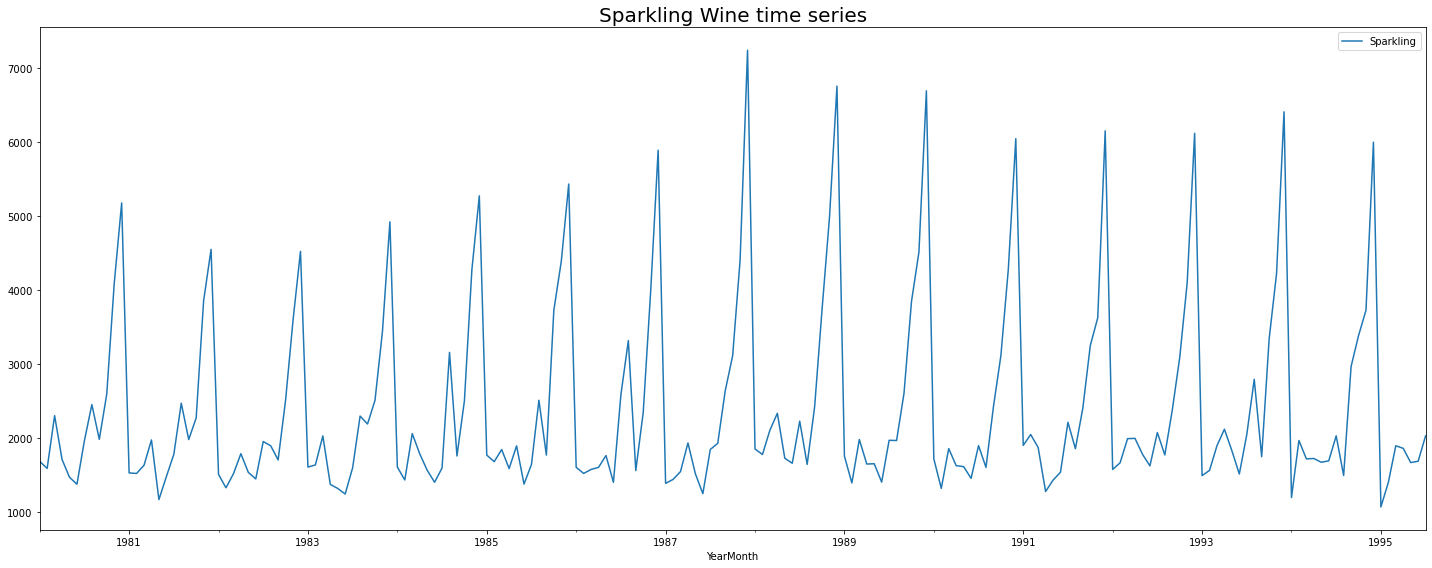

In [15]:
Sparkling.plot(figsize=(20,8))
plt.grid();
plt.title('Sparkling Wine time series', fontsize=20);
plt.grid();
plt.legend(['Sparkling'], loc='best');
plt.tight_layout();

### Plotinng the Time series graph for Rose data set

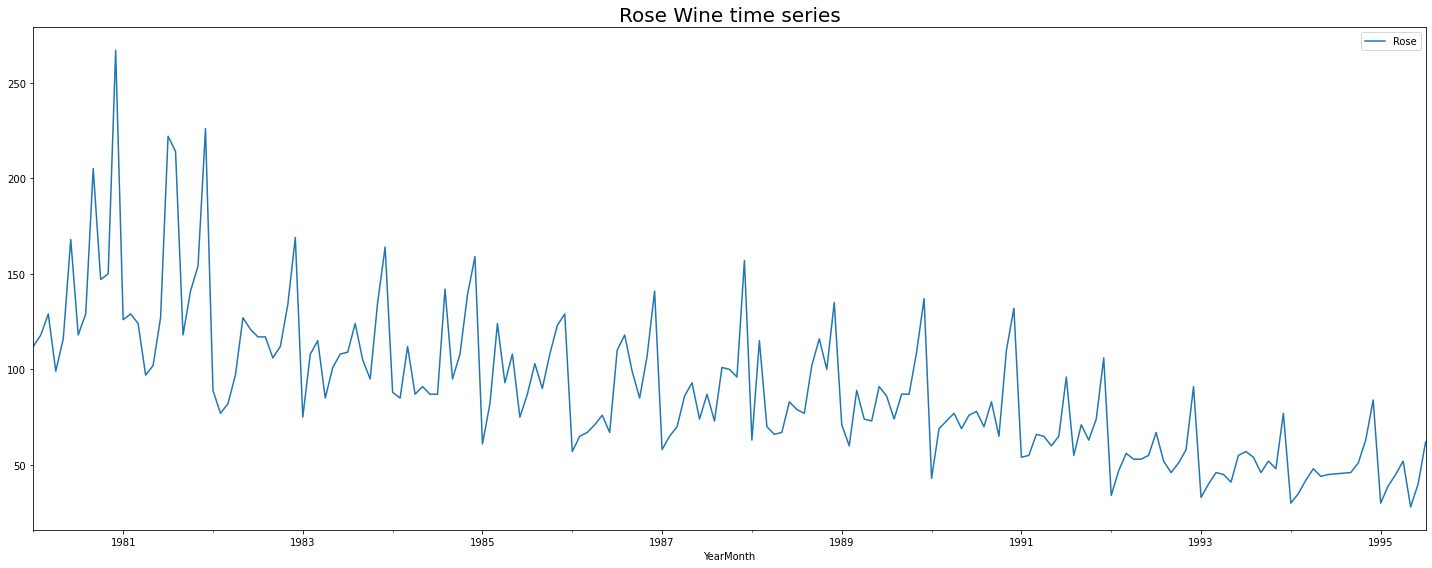

In [16]:
Rose.plot(figsize=(20,8))
plt.grid();
plt.title('Rose Wine time series', fontsize=20);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout();

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Yearly Boxplot of Sparkling Data set**

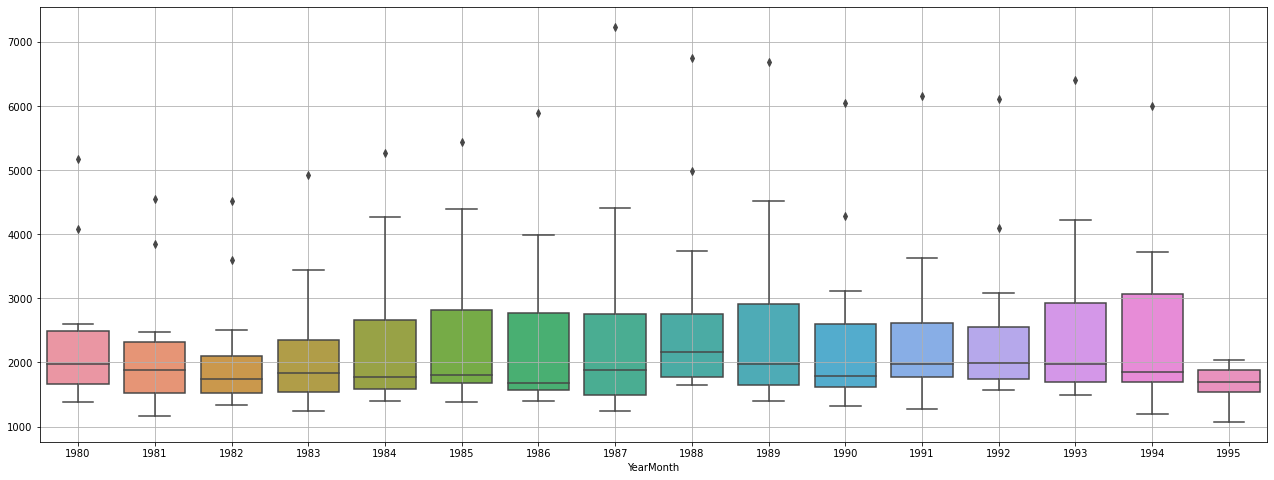

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling.index.year,y = Sparkling.values[:,0],ax=ax)
plt.grid();


**Yearly Boxplot of Rose Data set**

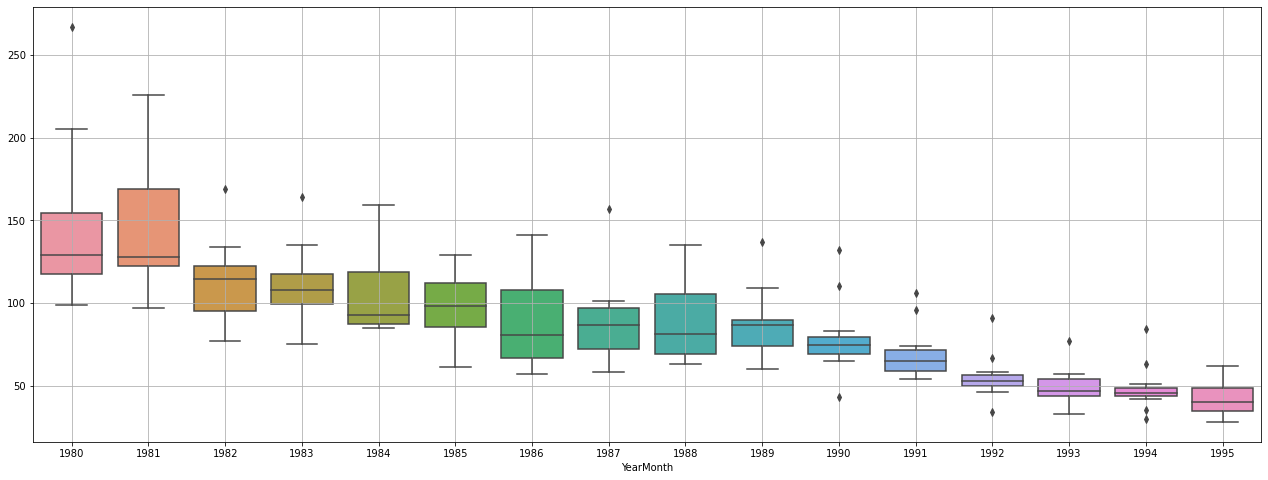

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose.index.year,y = Rose.values[:,0],ax=ax)
plt.grid();


**Monthly Boxplot of Sparkling Data set**

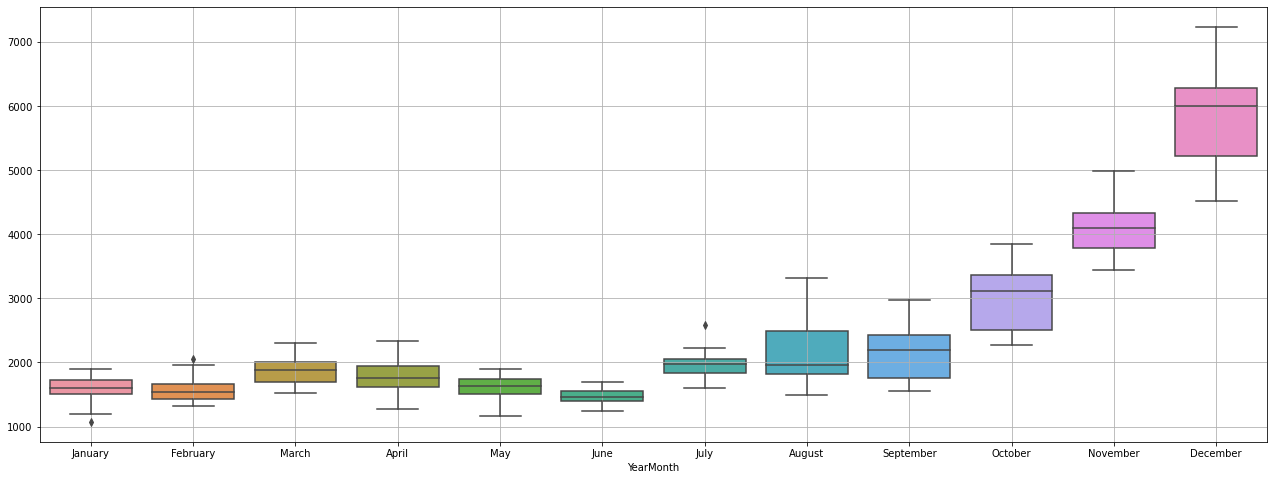

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling.index.month_name(),y = Sparkling.values[:,0],ax=ax)
plt.grid();

**Monthly Boxplot of Rose Data set**

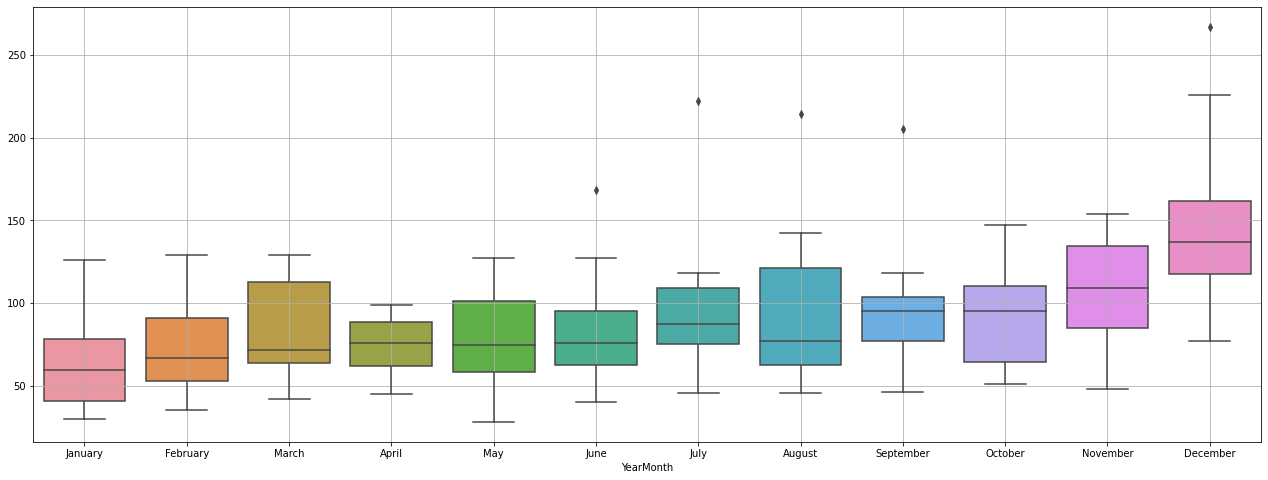

In [20]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose.index.month_name(),y = Rose.values[:,0],ax=ax)
plt.grid();

### Creating Pivot table and Line graph for Sparkling data set

In [21]:
#Creating PIVOT table.
monthly_sales_across_years_sparkling  = pd.pivot_table(Sparkling, values = 'Sparkling', columns = Sparkling.index.month_name(), index = Sparkling.index.year)
monthly_sales_across_years_sparkling

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

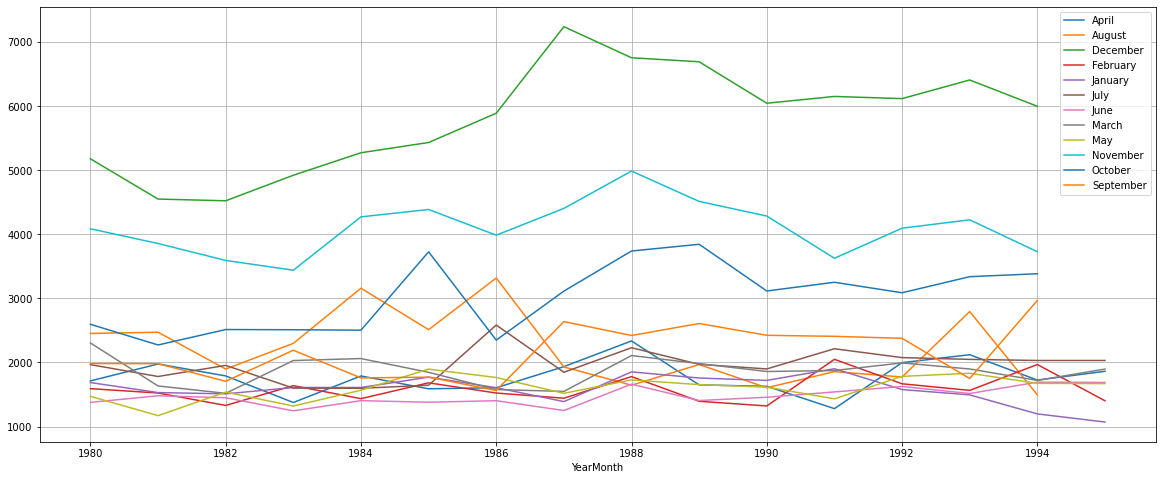

In [22]:
#Dec registers the highest amount of sales
monthly_sales_across_years_sparkling.plot(figsize=(20,8))
plt.grid()
plt.legend(loc='best');

### Creating Pivot table and Line graph for Rose data set

In [23]:
#Creating PIVOT table.
monthly_sales_across_years_rose = pd.pivot_table(Rose, values = 'Rose', columns = Rose.index.month_name(), index = Rose.index.year)
monthly_sales_across_years_rose

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

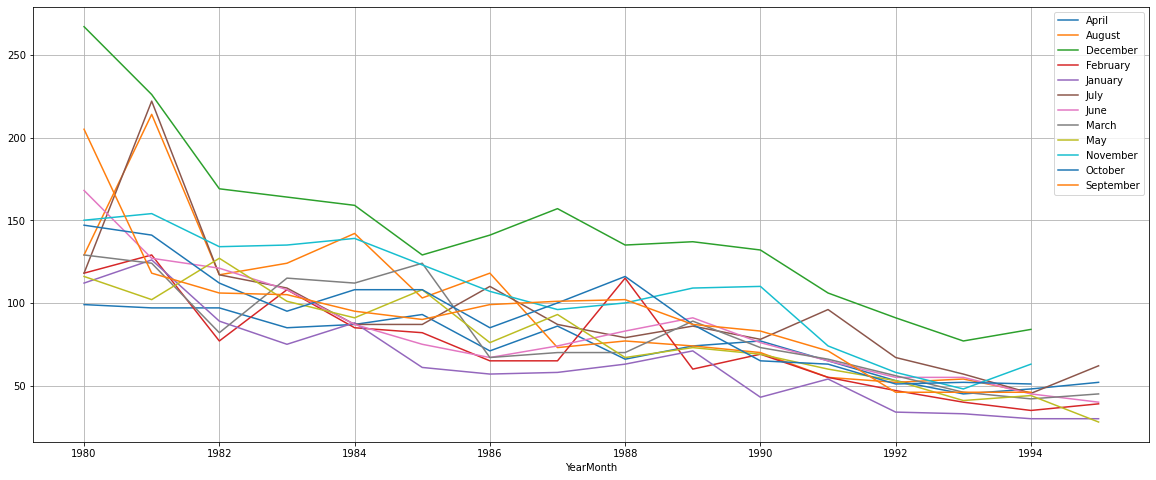

In [24]:
#Dec registers the highest amount of sales
monthly_sales_across_years_rose.plot(figsize=(20,8))
plt.grid()
plt.legend(loc='best');

### Decompose the Time Series and plot the different components.

###  Additive Decomposition of Sparkling data set

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

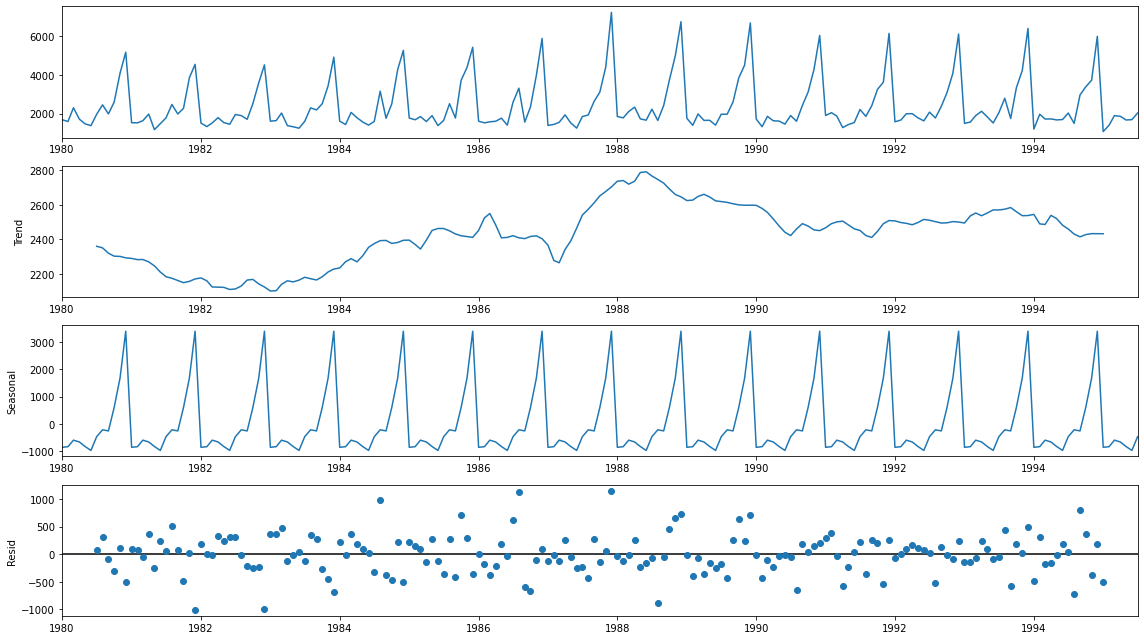

In [26]:
decompose_sparkling = seasonal_decompose(Sparkling, model = 'additive')
decompose_sparkling.plot();

In [27]:
trend=decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

In [28]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


### Additive Decomposition of Rose data set

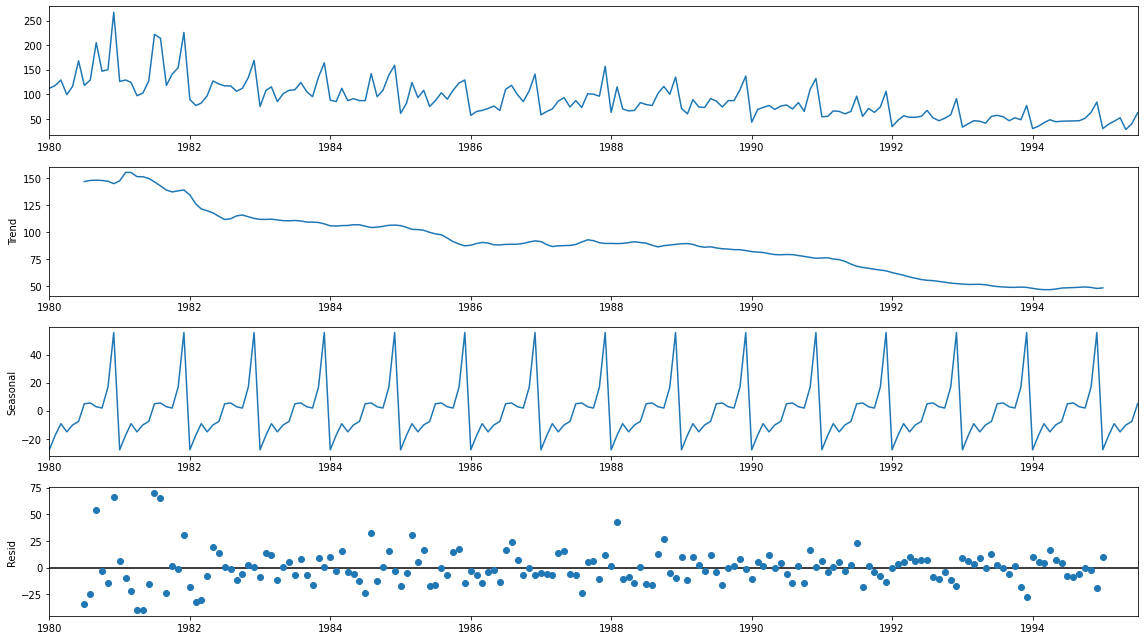

In [29]:
decompose_rose = seasonal_decompose(Rose, model = 'additive')
decompose_rose.plot();

In [30]:
trendr=decompose_rose.trend
seasonalityr=decompose_rose.seasonal
residualr=decompose_rose.resid

In [31]:
print('Trend','\n',trendr.head(12),'\n')
print('Seasonality','\n',seasonalityr.head(12),'\n')
print('Residual','\n',residualr.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

### Multiplicative  Decomposition of Sparkling data set

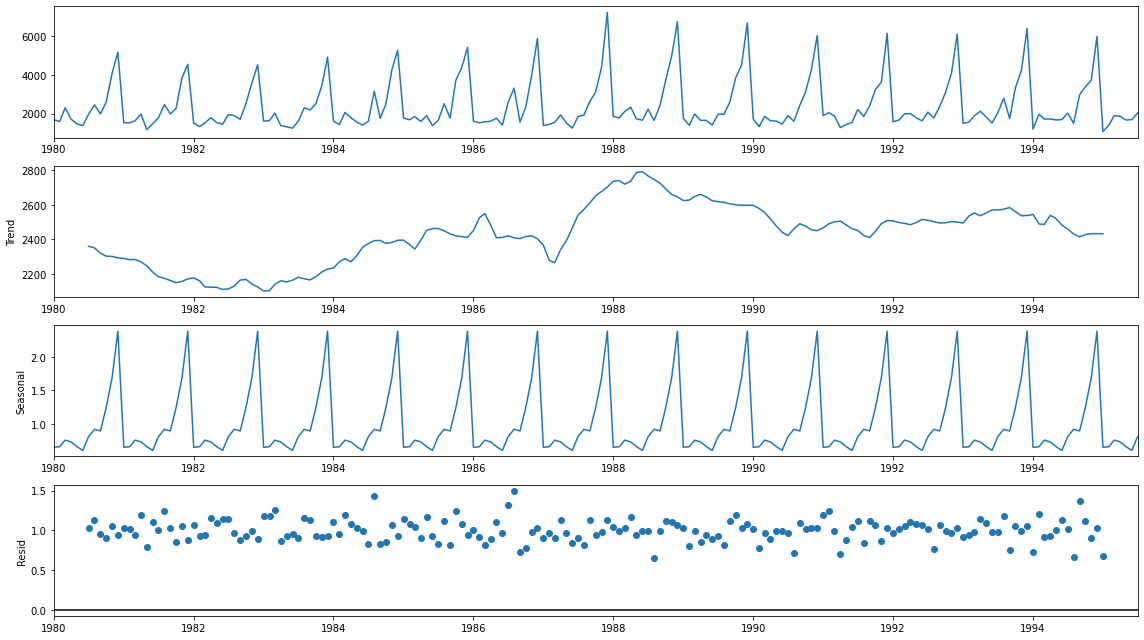

In [32]:
decompose_sparkling = seasonal_decompose(Sparkling, model = 'multiplicative')
decompose_sparkling.plot();

In [33]:
trend=decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

In [34]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Multiplicative  Decomposition of Rose data set

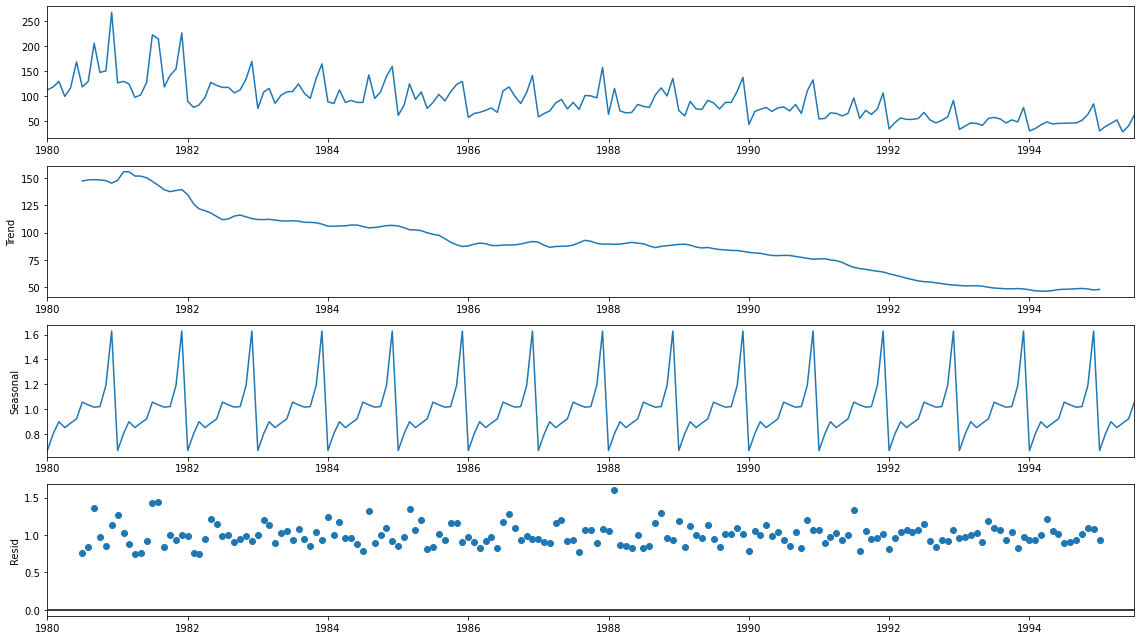

In [35]:
decompose_rose = seasonal_decompose(Rose, model = 'multiplicative')
decompose_rose.plot();

In [36]:
trendr=decompose_rose.trend
seasonalityr=decompose_rose.seasonal
residualr=decompose_rose.resid

In [37]:
print('Trend','\n',trendr.head(12),'\n')
print('Seasonality','\n',seasonalityr.head(12),'\n')
print('Residual','\n',residualr.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

## 3. Split the data into training and test. The test data should start in 1991.

In [38]:
# Sparkling  Data Split 
strain = Sparkling[Sparkling.index<'1991'] 
stest = Sparkling[Sparkling.index>='1991']

In [39]:
# Rose  Data Split 
rtrain = Rose[Rose.index<'1991'] 
rtest = Rose[Rose.index>='1991']

#### Sparking data set Train and Test data set shape

In [40]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


#### Rose data set Train and Test data set shape

In [41]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [42]:
# SPARKLING  DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [43]:
# ROSE  DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

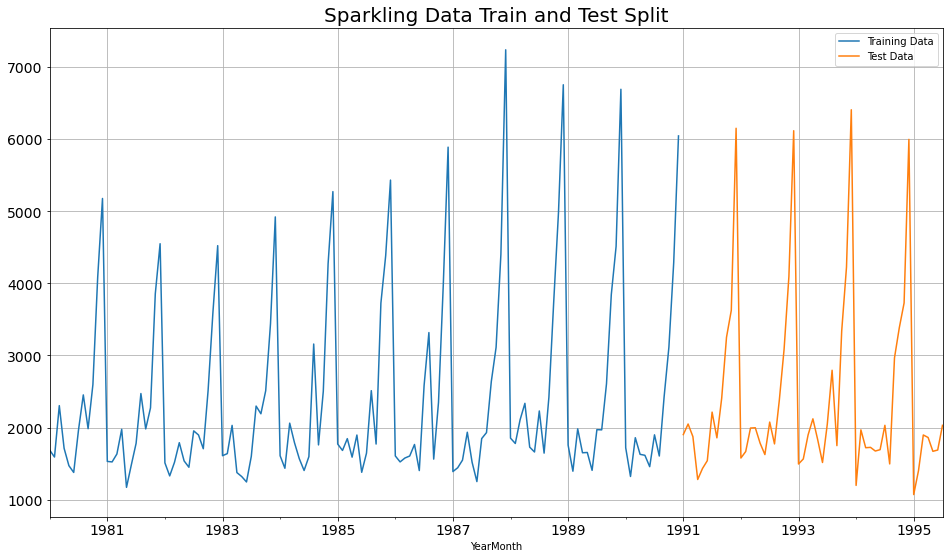

In [44]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=20)
plt.show();

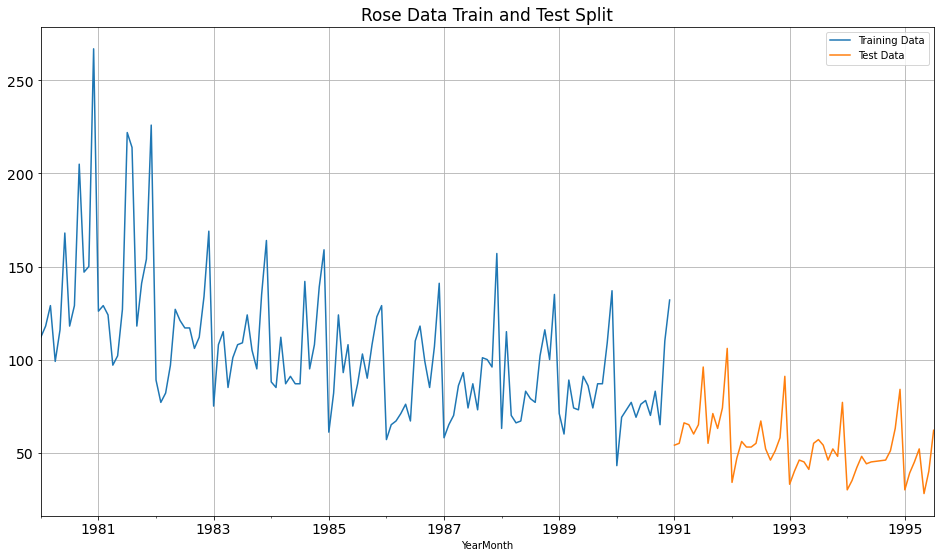

In [352]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.show();

 ### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [46]:
# Sparkling data set

In [47]:
strain.shape
stest.shape

(132, 1)

(55, 1)

In [48]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


#### We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [49]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [50]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  Time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  Time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  Time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  Time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

#### Now that our training and test data has been modified, let us go ahead use  Linear Regression 

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Sparkling'])

LinearRegression()

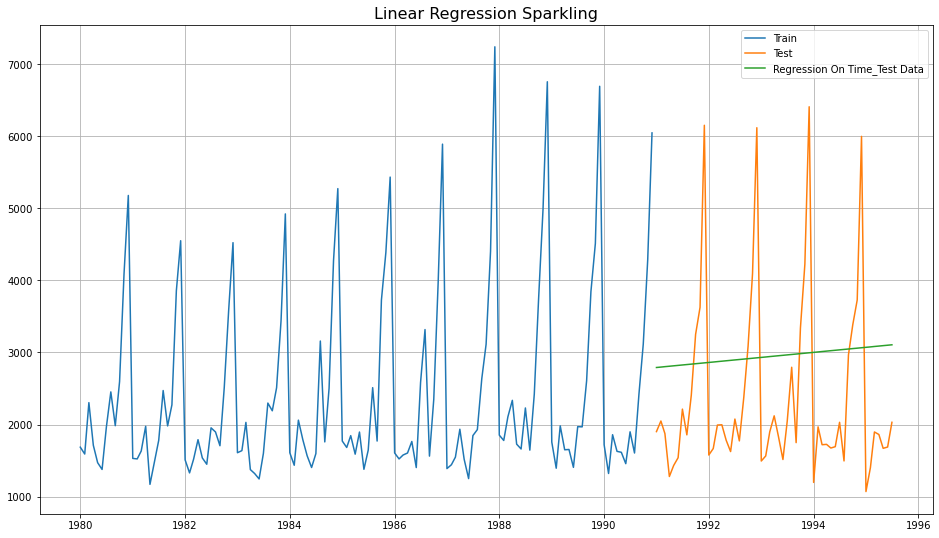

In [54]:
train_predictions_model11 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model11

test_predictions_model11= lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model11

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();

In [55]:
#### Rose data set

In [56]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [57]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [58]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [59]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  Time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  Time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  Time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  Time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [60]:
lr1 = LinearRegression()

In [61]:
lr1.fit(LinearRegression_train[['Time']],LinearRegression_train['Rose'])

LinearRegression()

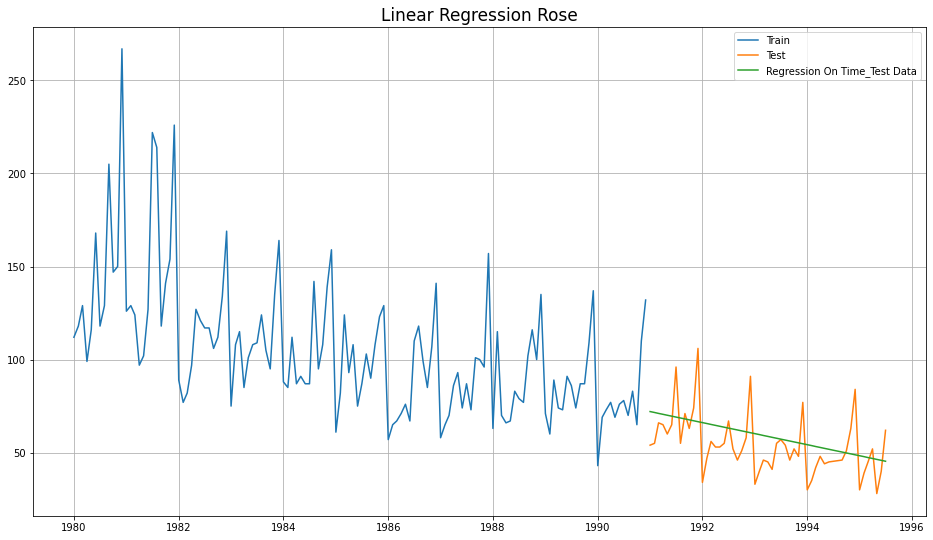

In [62]:
train_predictions_model1= lr1.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1= lr1.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();

#### Model Evaluation 

In [63]:
from sklearn import metrics

In [64]:
rmse_model11_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model11,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [65]:
rmse_model1_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [66]:
RMSE_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_model11_test]},index=['RegressionOnTime'])
RMSE_rose = pd.DataFrame({'Test RMSE Rose': [rmse_model1_test]},index=['RegressionOnTime'])

In [67]:
RMSE = pd.merge(RMSE_sparkling, RMSE_rose, left_index=True, right_index=True)

In [68]:
RMSE

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime          1389.135175       15.268955

## Model 2: Naive Approach : 𝑦̂ 𝑡+1=𝑦𝑡

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [69]:
# Sparkling data set

In [70]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [71]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [72]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

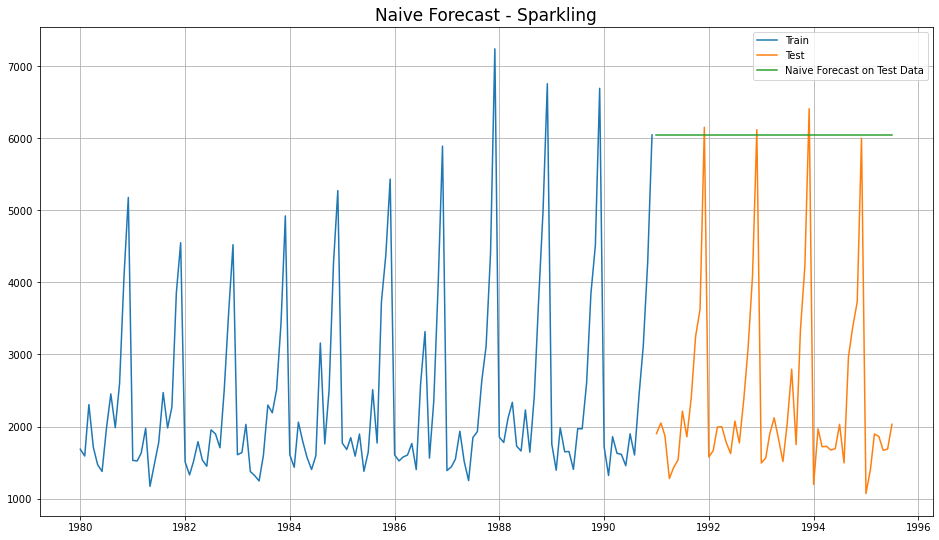

In [73]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();

In [74]:
# Rose data set

In [75]:
NaiveModel_trainr = rtrain.copy()
NaiveModel_testr = rtest.copy()

In [76]:
NaiveModel_testr['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_testr['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

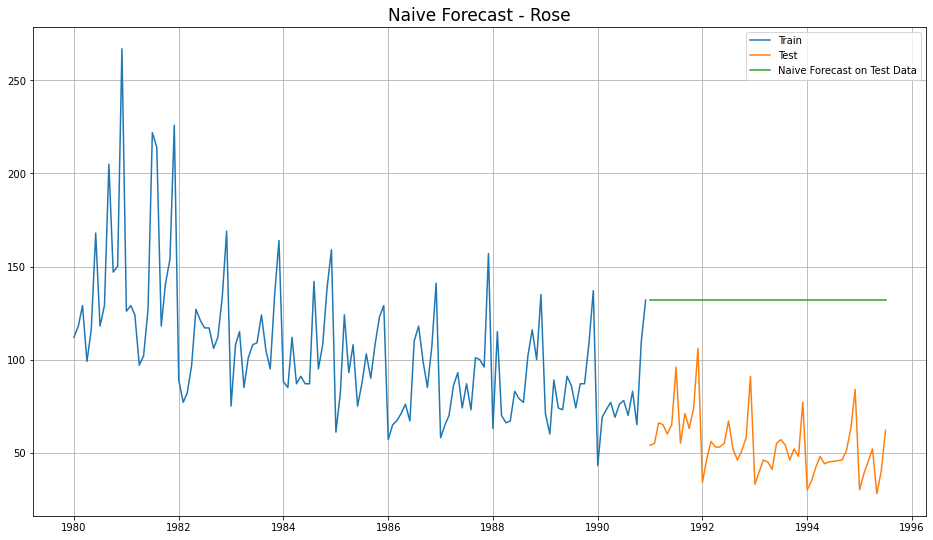

In [77]:
plt.plot(NaiveModel_trainr['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(NaiveModel_testr['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();

### Model Evaluation

In [78]:
rmse_model00_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model00_test))

For Naive Model forecast on the Test Data,  RMSE is 3864.279


In [79]:
rmse_model000_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_testr['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model000_test))

For Naive Model forecast on the Test Data,  RMSE is 79.719


In [80]:
RMSE

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime          1389.135175       15.268955

In [81]:
RMSE_Naive = pd.DataFrame({'Test RMSE Sparkling': [rmse_model00_test]},index=['NaiveModel'])

In [82]:
RMSE_Naive1  = pd.DataFrame({'Test RMSE Rose': [rmse_model000_test]},index=['NaiveModel'])

In [83]:
RMSE_Naive1 = RMSE_Naive.join(RMSE_Naive1)

In [84]:
RMSE_Naive1

Test RMSE Sparkling  Test RMSE Rose
NaiveModel          3864.279352       79.718773

In [85]:
All_RMSE = pd.concat([RMSE, RMSE_Naive1], axis=0)

In [86]:
All_RMSE

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime          1389.135175       15.268955
NaiveModel                3864.279352       79.718773

### Model 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [87]:
# Sparkling data set

In [88]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [89]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

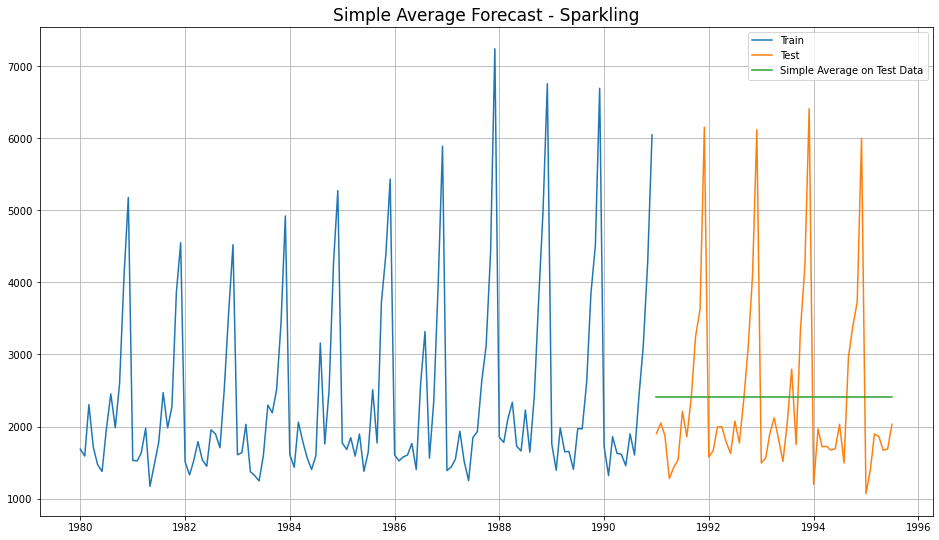

In [90]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();

In [91]:
# Rose data set

In [92]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [93]:
SimpleAverage_trainr = rtrain.copy()
SimpleAverage_testr = rtest.copy()

In [94]:
SimpleAverage_testr['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_testr.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

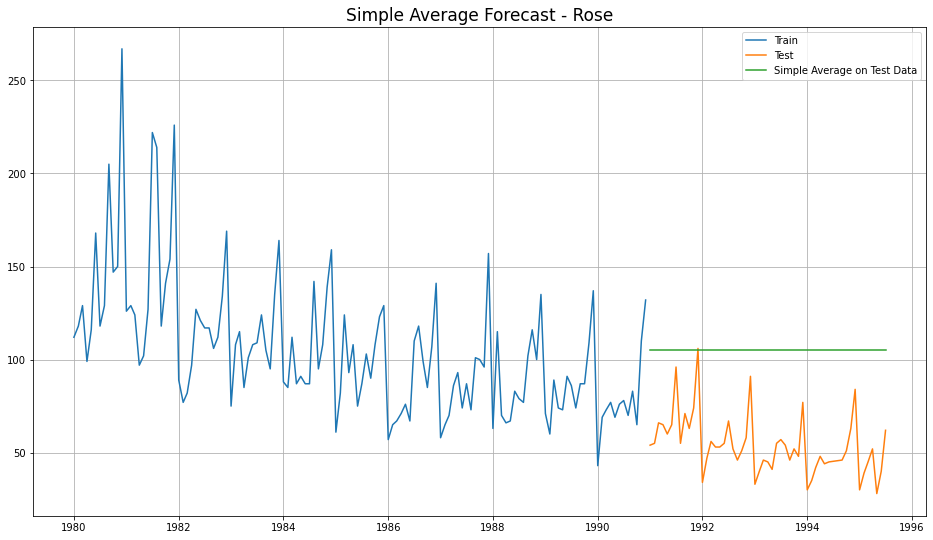

In [95]:
plt.plot(SimpleAverage_trainr['Rose'], label='Train')
plt.plot(SimpleAverage_testr['Rose'], label='Test')
plt.plot(SimpleAverage_testr['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();

### Model Evaluation

In [96]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [97]:
rmse_model323_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_testr['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model323_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [98]:
RMSE_SAF = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]},index=['SimpleAverageModel'])

In [99]:
RMSE_SAF1  = pd.DataFrame({'Test RMSE Rose': [rmse_model323_test]},index=['SimpleAverageModel'])

In [100]:
RMSE_SAF1 = RMSE_SAF1.join(RMSE_SAF)

In [101]:
RMSE_SAF1

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [102]:
RMSE_all = pd.concat([All_RMSE, RMSE_SAF1], axis=0)

In [103]:
RMSE_all

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime            1389.135175       15.268955
NaiveModel                  3864.279352       79.718773
SimpleAverageModel          1275.081804       53.460570

### Model 4: Moving Average(MA)

For the moving average model we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [104]:
# Sparkling data set

In [105]:
MovingAverage = Sparkling.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [106]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

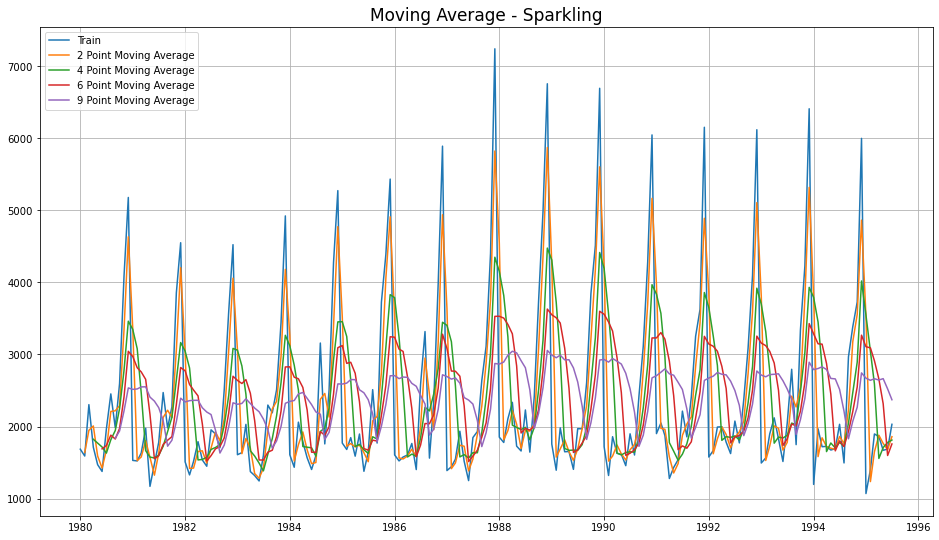

In [107]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17);

#### Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.


In [108]:
# Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

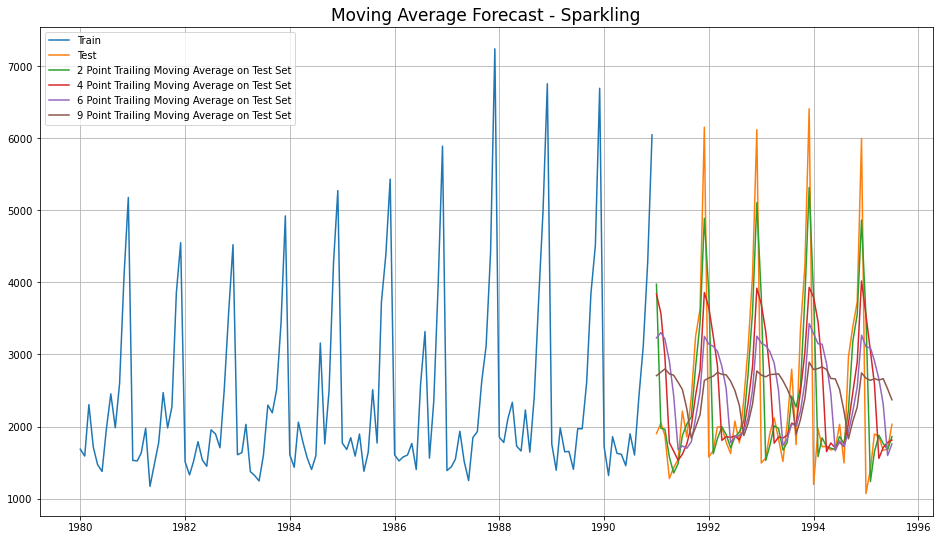

In [109]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17);

### Model Evaluation 

Done only on the test data

In [110]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [111]:
MA_Result = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4,
                                                  rmse_model4_test_6,rmse_model4_test_9]},
                         index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage',
                                                                                                                                       '6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

MA_Result

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [112]:
# Rose data set

In [113]:
MovingAverager = Rose.copy()
MovingAverager.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [114]:
MovingAverager['Trailing_2'] = MovingAverager['Rose'].rolling(2).mean()
MovingAverager['Trailing_4'] = MovingAverager['Rose'].rolling(4).mean()
MovingAverager['Trailing_6'] = MovingAverager['Rose'].rolling(6).mean()
MovingAverager['Trailing_9'] = MovingAverager['Rose'].rolling(9).mean()

MovingAverager.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

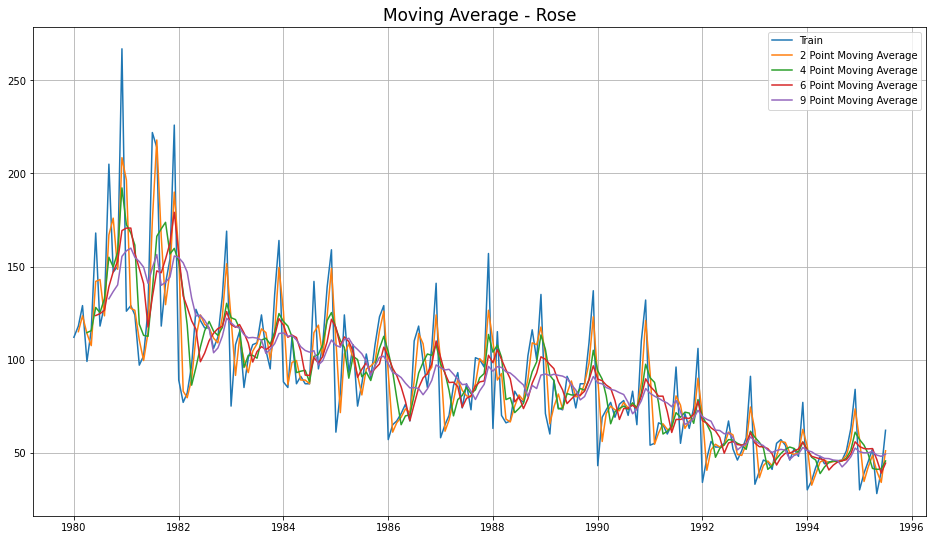

In [115]:
plt.plot(MovingAverager['Rose'], label='Train')
plt.plot(MovingAverager['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverager['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverager['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverager['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Rose', fontsize=17);

In [116]:
trailing_MovingAverage_train=MovingAverager[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverager[MovingAverage.index>='1991']

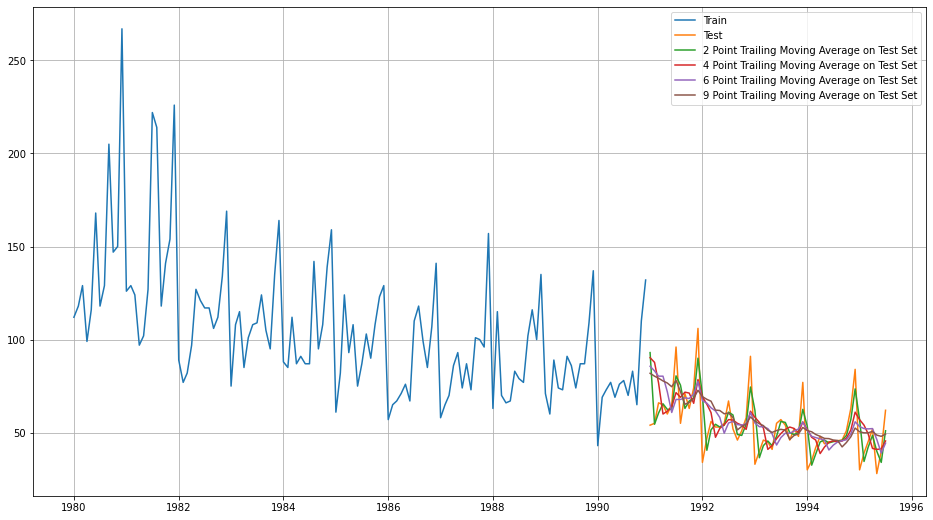

In [117]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [118]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [119]:
MA_Resultr = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4,
                                                  rmse_model4_test_6,rmse_model4_test_9]},
                         index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage',
                                                                                                                                       '6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

MA_Resultr

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

In [120]:
RMSE_all

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime            1389.135175       15.268955
NaiveModel                  3864.279352       79.718773
SimpleAverageModel          1275.081804       53.460570

In [121]:
RMSE_new = MA_Result.join(MA_Resultr, how='outer')
RMSE_new

Test RMSE Sparkling  Test RMSE Rose
2pointTrailingMovingAverage           813.400684       11.529278
4pointTrailingMovingAverage          1156.589694       14.451403
6pointTrailingMovingAverage          1283.927428       14.566327
9pointTrailingMovingAverage          1346.278315       14.727630

In [122]:
RMSE_neww = pd.concat([RMSE_all, RMSE_new], axis=0)
RMSE_neww

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime                     1389.135175       15.268955
NaiveModel                           3864.279352       79.718773
SimpleAverageModel                   1275.081804       53.460570
2pointTrailingMovingAverage           813.400684       11.529278
4pointTrailingMovingAverage          1156.589694       14.451403
6pointTrailingMovingAverage          1283.927428       14.566327
9pointTrailingMovingAverage          1346.278315       14.727630

In [123]:
RMSE_latest = RMSE_neww.copy()
RMSE_latest

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime                     1389.135175       15.268955
NaiveModel                           3864.279352       79.718773
SimpleAverageModel                   1275.081804       53.460570
2pointTrailingMovingAverage           813.400684       11.529278
4pointTrailingMovingAverage          1156.589694       14.451403
6pointTrailingMovingAverage          1283.927428       14.566327
9pointTrailingMovingAverage          1346.278315       14.727630

#### Consolidated plots of All Models- Sparkling

In [124]:
# Linear Regression  on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]

In [125]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [126]:
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time

In [127]:
lr = LinearRegression()

In [128]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

LinearRegression()

In [129]:
 # Naive Bayes on Sparkling 
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [130]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

In [131]:
## Simple Average on Sparkling 
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [132]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

In [133]:
# Moving Average on Sparkling 
MovingAverage = Sparkling.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

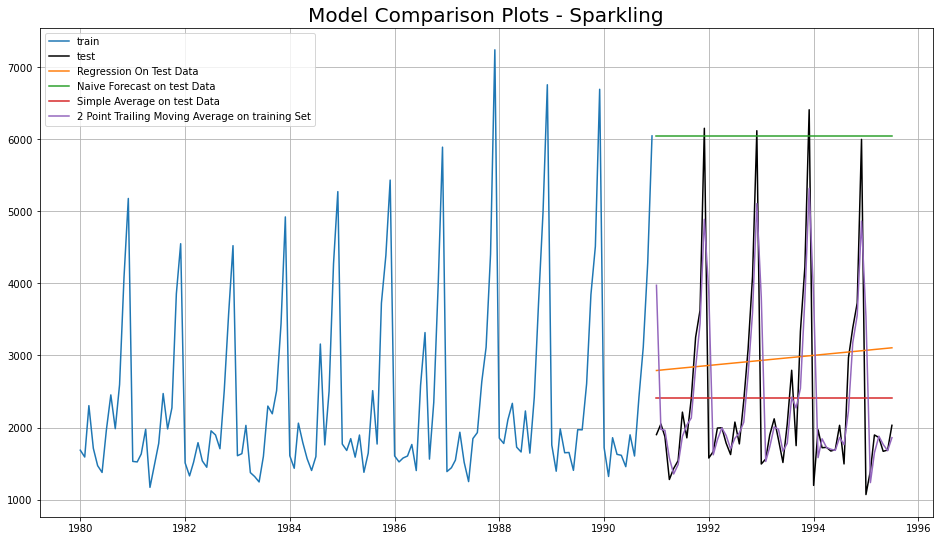

In [134]:
plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='black')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=20)
plt.grid();

### Method 5: Simple Exponential Smoothing

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [135]:
# Sparkling data set

In [136]:
SES_train = strain.copy()
SES_test = stest.copy()

In [137]:
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [138]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [139]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [140]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

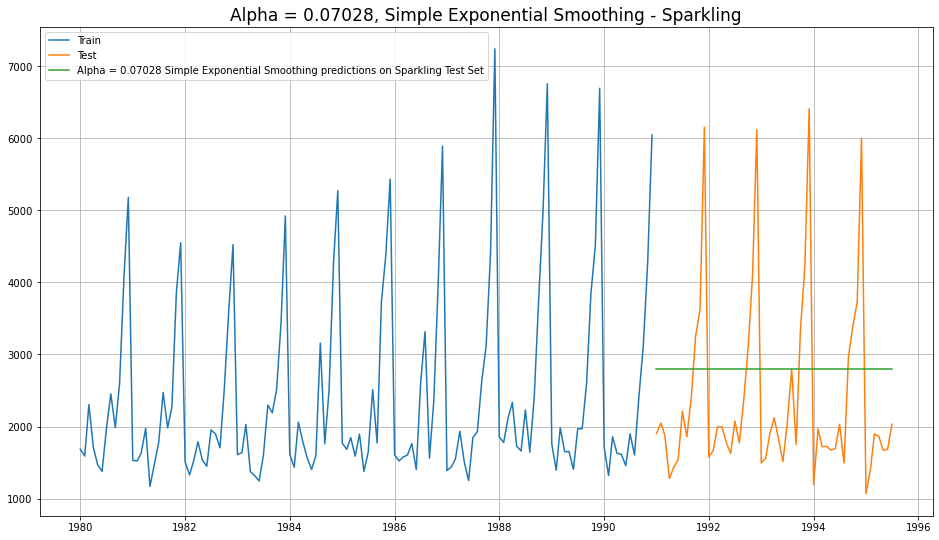

In [141]:
## Plotting the Training data, Test data and the forecasted values
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);

In [142]:
print('SimpleExpSmoothing for Sparkling data set is :',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))

SimpleExpSmoothing for Sparkling data set is : 1338.0008612252468


In [143]:
## Rose data set

In [144]:
SES_trainr = rtrain.copy()
SES_testr = rtest.copy()

In [145]:
model_SESr = SimpleExpSmoothing(SES_trainr,initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
model_SES_autofitr = model_SESr.fit(optimized=True)

In [147]:
model_SES_autofitr.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [148]:
SES_predict_rpark = model_SES_autofitr.forecast(steps=len(rtest))
SES_predict_rpark

1991-01-01    87.104992
1991-02-01    87.104992
1991-03-01    87.104992
1991-04-01    87.104992
1991-05-01    87.104992
1991-06-01    87.104992
1991-07-01    87.104992
1991-08-01    87.104992
1991-09-01    87.104992
1991-10-01    87.104992
1991-11-01    87.104992
1991-12-01    87.104992
1992-01-01    87.104992
1992-02-01    87.104992
1992-03-01    87.104992
1992-04-01    87.104992
1992-05-01    87.104992
1992-06-01    87.104992
1992-07-01    87.104992
1992-08-01    87.104992
1992-09-01    87.104992
1992-10-01    87.104992
1992-11-01    87.104992
1992-12-01    87.104992
1993-01-01    87.104992
1993-02-01    87.104992
1993-03-01    87.104992
1993-04-01    87.104992
1993-05-01    87.104992
1993-06-01    87.104992
1993-07-01    87.104992
1993-08-01    87.104992
1993-09-01    87.104992
1993-10-01    87.104992
1993-11-01    87.104992
1993-12-01    87.104992
1994-01-01    87.104992
1994-02-01    87.104992
1994-03-01    87.104992
1994-04-01    87.104992
1994-05-01    87.104992
1994-06-01    87

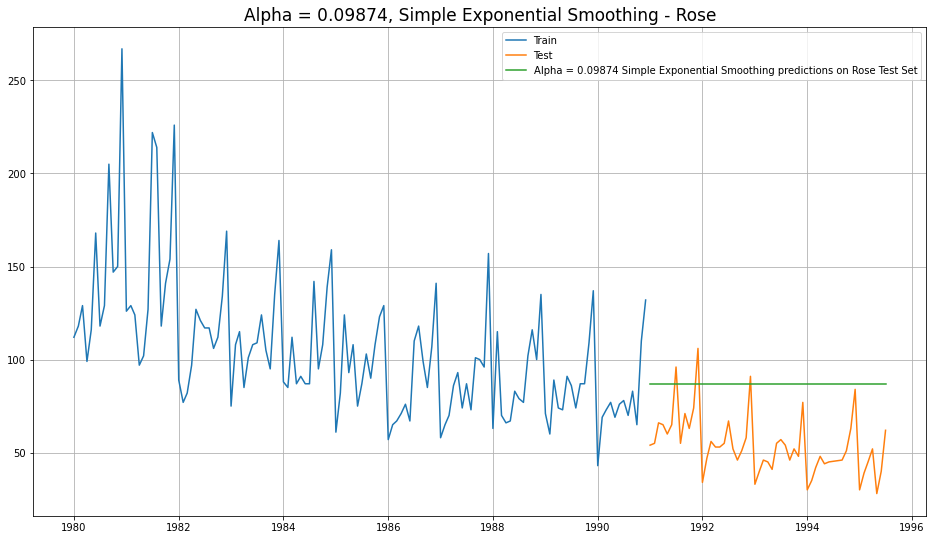

In [149]:
## Plotting the Training data, Test data and the forecasted values
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(SES_predict_rpark, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);

In [150]:
SES_spark = metrics.mean_squared_error(stest.values,SES_predict_spark.values,squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(SES_spark))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1338.001


In [151]:
SES_rose = metrics.mean_squared_error(rtest.values,SES_predict_rpark.values,squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(SES_rose))

For Simple Average forecast on Sparkling Test Data,  RMSE is 36.796


In [152]:
RMSE_SES = pd.DataFrame({'Test RMSE Sparkling': [SES_spark]},index=['Simple Exponential Smoothing'])

In [153]:
RMSE_SES1 = pd.DataFrame({'Test RMSE Rose': [SES_rose]},index=['Simple Exponential Smoothing'])

In [154]:
RMSE_SES = RMSE_SES.join(RMSE_SES1)

In [155]:
RMSE_SES

Test RMSE Sparkling  Test RMSE Rose
Simple Exponential Smoothing          1338.000861       36.796236

In [156]:
RMSE_latest = pd.concat([RMSE_latest, RMSE_SES], axis=0)

In [157]:
RMSE_latest

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime                      1389.135175       15.268955
NaiveModel                            3864.279352       79.718773
SimpleAverageModel                    1275.081804       53.460570
2pointTrailingMovingAverage            813.400684       11.529278
4pointTrailingMovingAverage           1156.589694       14.451403
6pointTrailingMovingAverage           1283.927428       14.566327
9pointTrailingMovingAverage           1346.278315       14.727630
Simple Exponential Smoothing          1338.000861       36.796236

### Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.

In [158]:
# Sparkling data set

In [159]:
DES_strain = strain.copy()
DES_stest = stest.copy()

In [160]:
model_DES = Holt(DES_strain,initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [161]:
model_DES = model_DES.fit()

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [162]:
print('Holt model Exponential Smoothing Estimated Parameters :')
print(model_DES.params)

Holt model Exponential Smoothing Estimated Parameters :
{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [163]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

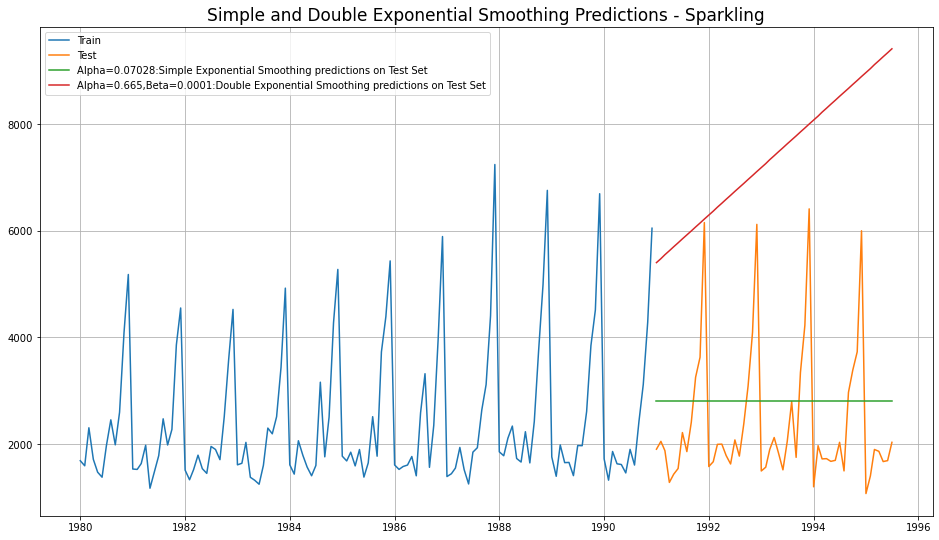

In [164]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);

In [165]:
# Rose data set

In [166]:
model_DESr = Holt(rtrain,initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [167]:
model_DESr = model_DESr.fit()

In [168]:
print('Holt model   Exponential Smoothing Estimated Parameters :')
print(model_DESr.params)

Holt model   Exponential Smoothing Estimated Parameters :
{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [169]:
DES_predict_rpark =  model_DESr.forecast(len(rtest))
DES_predict_rpark

1991-01-01    72.063269
1991-02-01    71.568892
1991-03-01    71.074514
1991-04-01    70.580136
1991-05-01    70.085758
1991-06-01    69.591381
1991-07-01    69.097003
1991-08-01    68.602625
1991-09-01    68.108247
1991-10-01    67.613870
1991-11-01    67.119492
1991-12-01    66.625114
1992-01-01    66.130736
1992-02-01    65.636358
1992-03-01    65.141981
1992-04-01    64.647603
1992-05-01    64.153225
1992-06-01    63.658847
1992-07-01    63.164470
1992-08-01    62.670092
1992-09-01    62.175714
1992-10-01    61.681336
1992-11-01    61.186959
1992-12-01    60.692581
1993-01-01    60.198203
1993-02-01    59.703825
1993-03-01    59.209447
1993-04-01    58.715070
1993-05-01    58.220692
1993-06-01    57.726314
1993-07-01    57.231936
1993-08-01    56.737559
1993-09-01    56.243181
1993-10-01    55.748803
1993-11-01    55.254425
1993-12-01    54.760047
1994-01-01    54.265670
1994-02-01    53.771292
1994-03-01    53.276914
1994-04-01    52.782536
1994-05-01    52.288159
1994-06-01    51

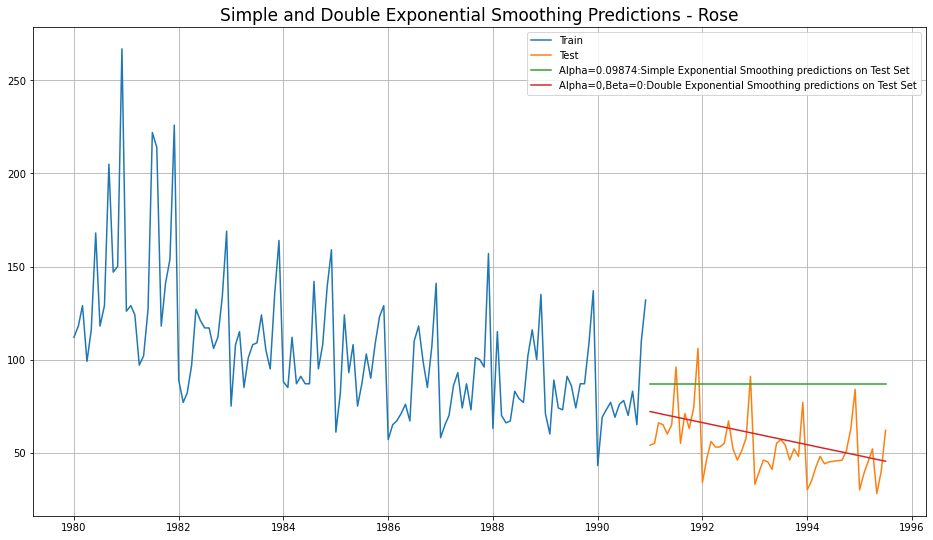

In [170]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(SES_predict_rpark, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rpark, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);

### We see that the double exponential smoothing is picking up the trend component along with the level component as well.

### Model Valuation 

In [171]:
DES_spark = metrics.mean_squared_error(stest.values,DES_predict_spark.values,squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(DES_spark))

For Simple Average forecast on Sparkling Test Data,  RMSE is 5291.880


In [172]:
DES_rose = metrics.mean_squared_error(rtest.values,DES_predict_rpark.values,squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(DES_rose))

For Simple Average forecast on Sparkling Test Data,  RMSE is 15.269


In [173]:
RMSE_DES = pd.DataFrame({'Test RMSE Sparkling': [DES_spark]},index=['Double Exponential Smoothing'])
RMSE_DES

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [174]:
RMSE_DES1 = pd.DataFrame({'Test RMSE Rose': [DES_rose]},index=['Double Exponential Smoothing'])
RMSE_DES1

Test RMSE Rose
Double Exponential Smoothing       15.268957

In [175]:
RMSE_DES1 = RMSE_DES.join(RMSE_DES1)
RMSE_DES1

Test RMSE Sparkling  Test RMSE Rose
Double Exponential Smoothing          5291.879833       15.268957

In [176]:
RMSE_latest2 = pd.concat([RMSE_latest, RMSE_DES1], axis=0)
RMSE_latest2

Test RMSE Sparkling  Test RMSE Rose
RegressionOnTime                      1389.135175       15.268955
NaiveModel                            3864.279352       79.718773
SimpleAverageModel                    1275.081804       53.460570
2pointTrailingMovingAverage            813.400684       11.529278
4pointTrailingMovingAverage           1156.589694       14.451403
6pointTrailingMovingAverage           1283.927428       14.566327
9pointTrailingMovingAverage           1346.278315       14.727630
Simple Exponential Smoothing          1338.000861       36.796236
Double Exponential Smoothing          5291.879833       15.268957

**Inference**

**Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.**

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model) 

Three parameters  α ,  β  and  γ  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [177]:
# Additive Season

In [178]:
# Sparkling data set

In [179]:
TES_train = strain.copy()
TES_test = stest.copy()

In [180]:
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [181]:
model_TES = model_TES.fit()

In [182]:
print(' Holt Winters model Exponential Smoothing Estimated Parameters :')
print(model_TES.params)

 Holt Winters model Exponential Smoothing Estimated Parameters :
{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [183]:
TES_predict_spark =  model_TES.forecast(len(stest))
TES_predict_spark

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

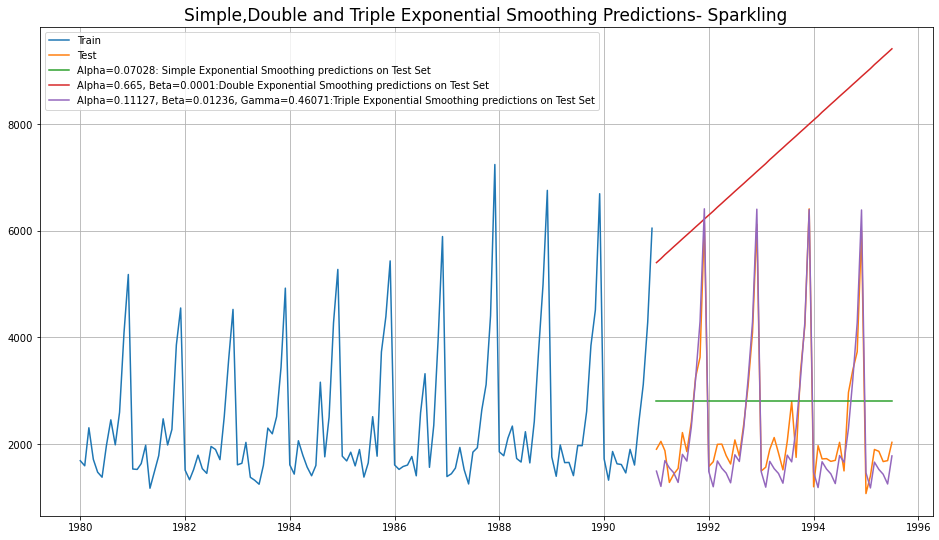

In [184]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);

In [185]:
# Rose data set

In [186]:
model_TESr = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [187]:
model_TESr = model_TESr.fit()

In [188]:
model_TESr

In [189]:
print('Holt model   Exponential Smoothing Estimated Parameters :')
print(model_TESr.params)

Holt model   Exponential Smoothing Estimated Parameters :
{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [190]:
TES_predict_add_rose =  model_TESr.forecast(len(rtest))
TES_predict_add_rose

1991-01-01     42.716117
1991-02-01     54.528923
1991-03-01     61.968476
1991-04-01     50.782306
1991-05-01     59.046436
1991-06-01     63.984756
1991-07-01     73.284643
1991-08-01     78.885632
1991-09-01     74.336035
1991-10-01     71.904228
1991-11-01     89.445446
1991-12-01    131.087464
1992-01-01     36.158278
1992-02-01     47.971084
1992-03-01     55.410637
1992-04-01     44.224467
1992-05-01     52.488597
1992-06-01     57.426917
1992-07-01     66.726804
1992-08-01     72.327793
1992-09-01     67.778196
1992-10-01     65.346389
1992-11-01     82.887606
1992-12-01    124.529625
1993-01-01     29.600439
1993-02-01     41.413245
1993-03-01     48.852798
1993-04-01     37.666628
1993-05-01     45.930758
1993-06-01     50.869078
1993-07-01     60.168965
1993-08-01     65.769954
1993-09-01     61.220357
1993-10-01     58.788550
1993-11-01     76.329767
1993-12-01    117.971785
1994-01-01     23.042600
1994-02-01     34.855406
1994-03-01     42.294959
1994-04-01     31.108789


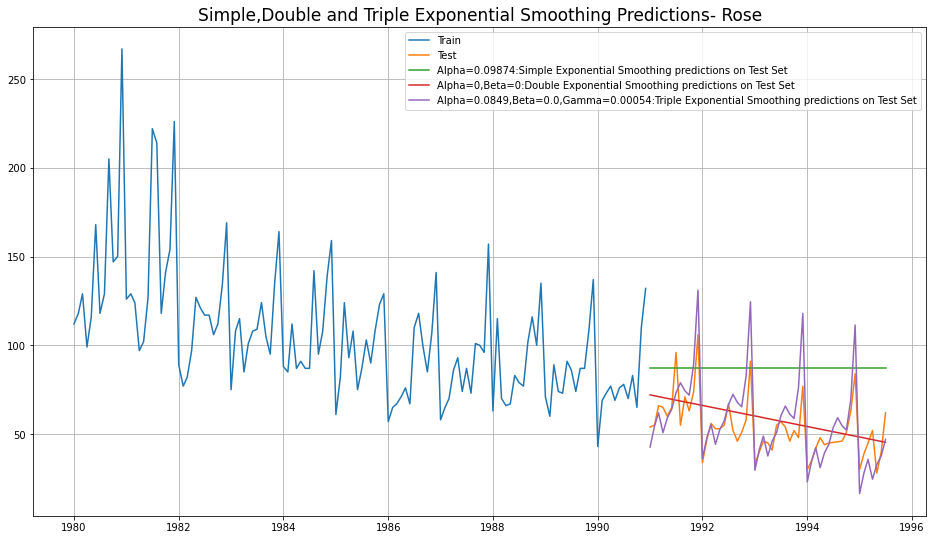

In [191]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(SES_predict_rpark, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rpark, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [192]:
TES_spark_add = metrics.mean_squared_error(stest.values,TES_predict_spark.values,squared=False)
print("For Triple Exponential Smoothing (Additive Season) on Sparkling Test Data,  RMSE is %3.3f" %(TES_spark_add))

For Triple Exponential Smoothing (Additive Season) on Sparkling Test Data,  RMSE is 378.626


In [193]:
TES_rose_add = metrics.mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)
print("For Triple Exponential Smoothing (Additive Season) on Rose Test Data,  RMSE is %3.3f" %(TES_rose_add))

For Triple Exponential Smoothing (Additive Season) on Rose Test Data,  RMSE is 14.278


In [194]:
RMSE_TES = pd.DataFrame({'Test RMSE Sparkling': [TES_spark_add]},index=['Triple Exponential Smoothing (Additive Season)'])
RMSE_TES

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.625883

In [195]:
RMSE_TES1 = pd.DataFrame({'Test RMSE Rose': [TES_rose_add]},index=['Triple Exponential Smoothing (Additive Season)'])
RMSE_TES1

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)        14.27844

In [196]:
RMSE_TES1 = RMSE_TES.join(RMSE_TES1)
RMSE_TES1

Test RMSE Sparkling  \
Triple Exponential Smoothing (Additive Season)           378.625883   

                                                Test RMSE Rose  
Triple Exponential Smoothing (Additive Season)        14.27844

In [197]:
RMSE_latest3 = pd.concat([RMSE_latest2, RMSE_TES1], axis=0)
RMSE_latest3

Test RMSE Sparkling  \
RegressionOnTime                                        1389.135175   
NaiveModel                                              3864.279352   
SimpleAverageModel                                      1275.081804   
2pointTrailingMovingAverage                              813.400684   
4pointTrailingMovingAverage                             1156.589694   
6pointTrailingMovingAverage                             1283.927428   
9pointTrailingMovingAverage                             1346.278315   
Simple Exponential Smoothing                            1338.000861   
Double Exponential Smoothing                            5291.879833   
Triple Exponential Smoothing (Additive Season)           378.625883   

                                                Test RMSE Rose  
RegressionOnTime                                     15.268955  
NaiveModel                                           79.718773  
SimpleAverageModel                                   53.460570  
2pointTrailingMovingAverage                          11.529278  
4pointTrailingMovingAverage                          14.451403  
6pointTrailingMovingAverage                          14.566327  
9pointTrailingMovingAverage                          14.727630  
Simple Exponential Smoothing                         36.796236  
Double Exponential Smoothing                         15.268957  
Triple Exponential Smoothing (Additive Season)       14.278440

In [198]:
# Multiplicative Season  

In [199]:
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [200]:
model_TES_am = model_TES_am.fit()

In [201]:
model_TES_am

In [202]:
print('Holt model   Exponential Smoothing Estimated Parameters :')
print(model_TES_am.params)

Holt model   Exponential Smoothing Estimated Parameters :
{'smoothing_level': 0.11101471561088701, 'smoothing_trend': 0.0493145907614654, 'smoothing_seasonal': 0.36244934537370843, 'damping_trend': nan, 'initial_level': 2356.496908624238, 'initial_trend': -9.809526161838415, 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
       0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
       1.87099202, 2.37505867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [203]:
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-01    1587.923122
1991-02-01    1356.650595
1991-03-01    1763.350752
1991-04-01    1656.524633
1991-05-01    1542.386930
1991-06-01    1355.481373
1991-07-01    1854.708133
1991-08-01    1820.662236
1991-09-01    2277.677337
1991-10-01    3123.119233
1991-11-01    4130.016390
1991-12-01    5893.151561
1992-01-01    1539.027193
1992-02-01    1314.768627
1992-03-01    1708.772893
1992-04-01    1605.120587
1992-05-01    1494.400631
1992-06-01    1313.200407
1992-07-01    1796.704221
1992-08-01    1763.574290
1992-09-01    2206.072310
1992-10-01    3024.677525
1992-11-01    3999.494123
1992-12-01    5706.416565
1993-01-01    1490.131264
1993-02-01    1272.886659
1993-03-01    1654.195033
1993-04-01    1553.716542
1993-05-01    1446.414333
1993-06-01    1270.919441
1993-07-01    1738.700308
1993-08-01    1706.486345
1993-09-01    2134.467283
1993-10-01    2926.235817
1993-11-01    3868.971855
1993-12-01    5519.681569
1994-01-01    1441.235336
1994-02-01    1231.004691
1994-03-01  

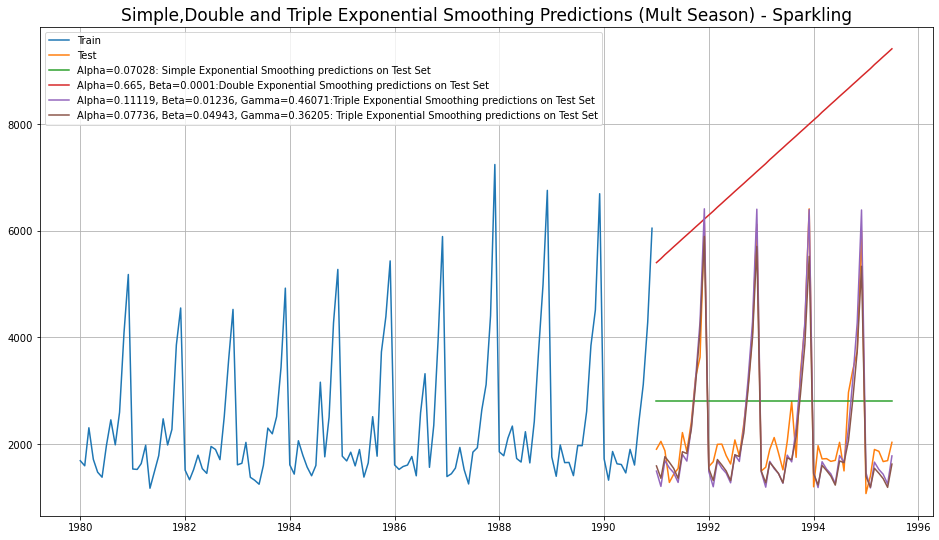

In [204]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

In [205]:
# Rose data set

In [206]:
model_TES_rose = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [207]:
model_TES_rose = model_TES_rose.fit()

In [208]:
print('Holt  Winters model   Exponential Smoothing Estimated Parameters :')
print(model_TES_rose.params)

Holt  Winters model   Exponential Smoothing Estimated Parameters :
{'smoothing_level': 0.07130285749243212, 'smoothing_trend': 0.04550837652110988, 'smoothing_seasonal': 8.385716703273524e-05, 'damping_trend': nan, 'initial_level': 163.60092654560762, 'initial_trend': -0.9804841883026134, 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
       0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
       1.1535151 , 1.59037115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [209]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_rose.forecast(len(rtest))
TES_predict_am_rose

1991-01-01     56.332862
1991-02-01     63.693063
1991-03-01     69.394575
1991-04-01     60.454513
1991-05-01     67.772390
1991-06-01     73.563907
1991-07-01     80.645116
1991-08-01     85.563629
1991-09-01     80.718288
1991-10-01     78.808929
1991-11-01     91.565566
1991-12-01    125.823875
1992-01-01     54.185254
1992-02-01     61.257120
1992-03-01     66.732091
1992-04-01     58.127595
1992-05-01     65.155411
1992-06-01     70.714123
1992-07-01     77.510896
1992-08-01     82.227449
1992-09-01     77.560771
1992-10-01     75.716019
1992-11-01     87.960222
1992-12-01    120.853321
1993-01-01     52.037646
1993-02-01     58.821176
1993-03-01     64.069608
1993-04-01     55.800678
1993-05-01     62.538432
1993-06-01     67.864338
1993-07-01     74.376675
1993-08-01     78.891269
1993-09-01     74.403254
1993-10-01     72.623110
1993-11-01     84.354879
1993-12-01    115.882766
1994-01-01     49.890039
1994-02-01     56.385233
1994-03-01     61.407124
1994-04-01     53.473761


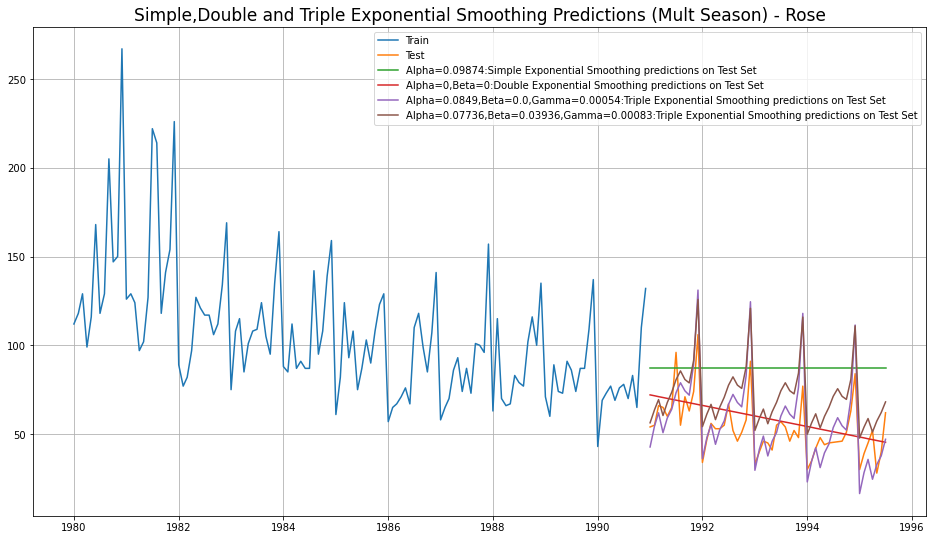

In [210]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(SES_predict_rpark, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rpark, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);


### Model Evaluation  

In [211]:
TES_spark_multi = metrics.mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)
print("For Triple Exponential Smoothing (Multiplicative  Season) on Sparkling Test Data,  RMSE is %3.3f" %(TES_spark_multi))

For Triple Exponential Smoothing (Multiplicative  Season) on Sparkling Test Data,  RMSE is 402.936


In [212]:
TES_rose_multi = metrics.mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)
print("For Triple Exponential Smoothing (Multiplicative Season) on Rose Test Data,  RMSE is %3.3f" %(TES_rose_multi))

For Triple Exponential Smoothing (Multiplicative Season) on Rose Test Data,  RMSE is 20.190


In [213]:
RMSE_TES_mul = pd.DataFrame({'Test RMSE Sparkling': [TES_spark_multi]},index=['Triple Exponential Smoothing (Multiplicative Season)'])
RMSE_TES_mul

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           402.936179

In [214]:
RMSE_TES_mul1 = pd.DataFrame({'Test RMSE Rose': [TES_rose_multi]},index=['Triple Exponential Smoothing (Multiplicative Season)'])
RMSE_TES_mul1

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       20.189764

In [215]:
RMSE_TES_mul1 = RMSE_TES_mul.join(RMSE_TES_mul1)
RMSE_TES_mul1

Test RMSE Sparkling  \
Triple Exponential Smoothing (Multiplicative Se...           402.936179   

                                                    Test RMSE Rose  
Triple Exponential Smoothing (Multiplicative Se...       20.189764

In [216]:
RMSE_latest4 = pd.concat([RMSE_latest3, RMSE_TES_mul1], axis=0)
RMSE_latest4

Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.000861   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.625883   
Triple Exponential Smoothing (Multiplicative Se...           402.936179   

                                                    Test RMSE Rose  
RegressionOnTime                                         15.268955  
NaiveModel                                               79.718773  
SimpleAverageModel                                       53.460570  
2pointTrailingMovingAverage                              11.529278  
4pointTrailingMovingAverage                              14.451403  
6pointTrailingMovingAverage                              14.566327  
9pointTrailingMovingAverage                              14.727630  
Simple Exponential Smoothing                             36.796236  
Double Exponential Smoothing                             15.268957  
Triple Exponential Smoothing (Additive Season)           14.278440  
Triple Exponential Smoothing (Multiplicative Se...       20.189764

### Best Model for Sparkling is Triple Exponential Smoothing (Additive Season)


### Best Model for Rose till Now - 2 Pt Moving Average

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

ADF test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

### 𝐻0 : The Time Series has a unit root and is thus non-stationary. 

### 𝐻1 : The Time Series does not have a unit root and is thus stationary. 

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the 𝛼 value.

In [217]:
# Checking Stationarity on Sparkling data set

In [218]:
dfss = adfuller(Sparkling,regression='ct')

In [219]:
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932692
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

 Let us take one level of differencing to see whether the series becomes stationary.

In [220]:
dfss = adfuller(Sparkling.diff().dropna(),regression='ct')

In [221]:
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Sparkling data is Stationary

Now, let us go ahead and plot the stationary series.

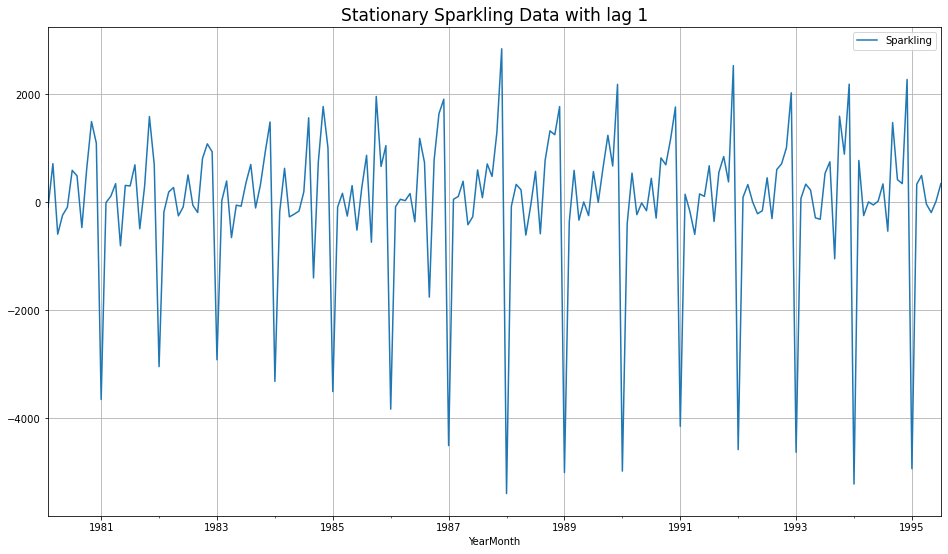

In [222]:
Sparkling.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);

In [223]:
# Check Stationarity of Rose Data set

In [224]:
dfrs = adfuller(Rose,regression='ct')

In [225]:
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793168
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [226]:
dfrs = adfuller(Rose.diff().dropna(),regression='ct')


In [227]:
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827353e-11
Number of lags used 12


We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis.

We conclude that with a lag 1 - now the Rose data is Stationary.

Now, let us go ahead and plot the stationary series.

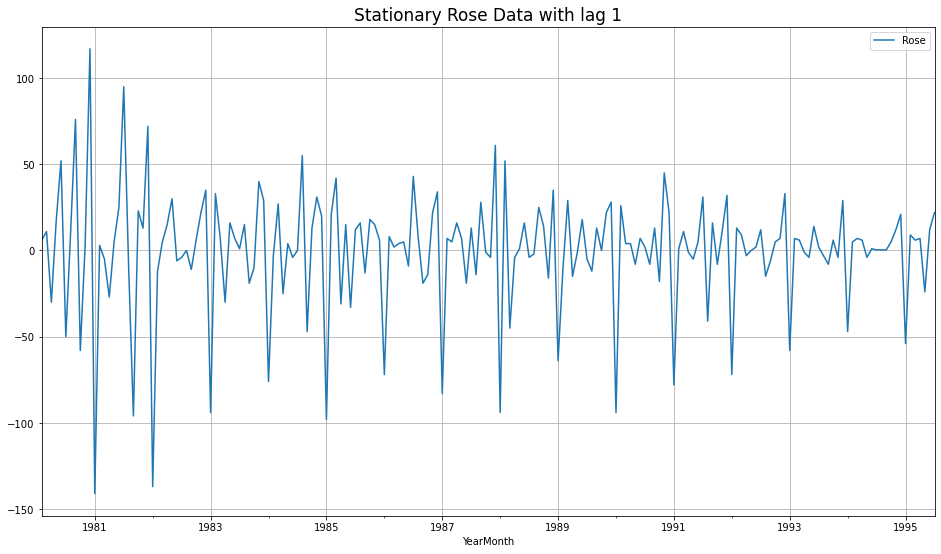

In [228]:
Rose.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [229]:
### Sparkling data set -ARIMA Model

In [230]:
import itertools

In [231]:
p = q = range(0, 4)
d= range(1,2)

In [232]:
pdq = list(itertools.product(p, d, q))

In [233]:
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [234]:
# Creating an empty Dataframe with column names only
Sparkling_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
Sparkling_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [235]:
from statsmodels.tsa.arima.model  import ARIMA

In [236]:
for param in pdq:
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values
    

ARIMA(0, 1, 0) - AIC:2267.6630357855465


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: 

ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(1, 1, 0) - AIC:2266.6085393190097


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed fro

ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2213.509212416925


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.825008517658


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\472337126.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [237]:
Sparkling_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.461689
14  (3, 1, 2)  2230.825009
11  (2, 1, 3)  2232.811211
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)    2234.5272
13  (3, 1, 1)  2235.498899
7   (1, 1, 3)  2235.607815
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [238]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 09 Apr 2023   AIC                           2213.509
Time:                        18:41:15   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [239]:
# Diagnostics plot - Sparkling

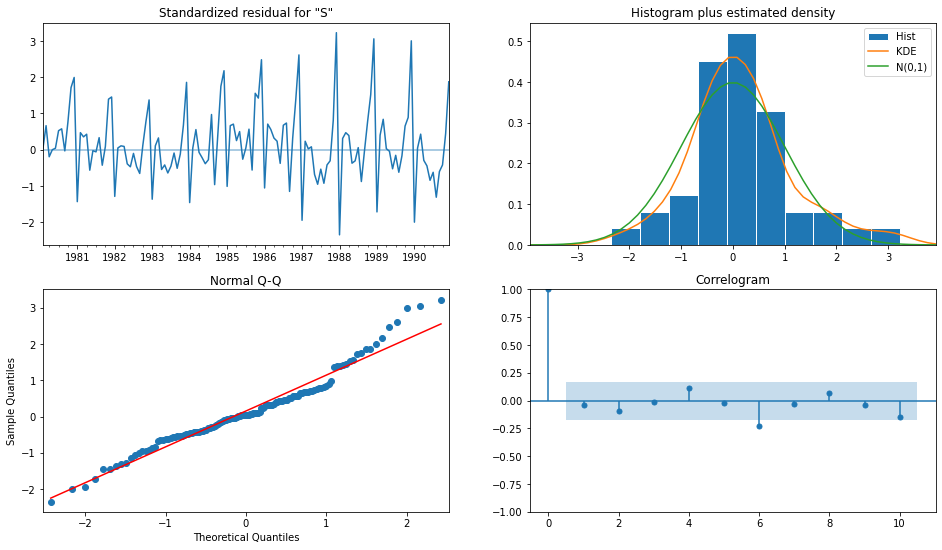

In [240]:
results_auto_ARIMA.plot_diagnostics();


In [241]:
# Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [242]:
from sklearn.metrics import mean_absolute_percentage_error


In [243]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9798208324635 
MAPE: 0.470999735086775


In [244]:
resultsDf = RMSE_latest4.copy()

In [245]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf

RMSE   MAPE
ARIMA(2,1,2)  1299.979821  0.471

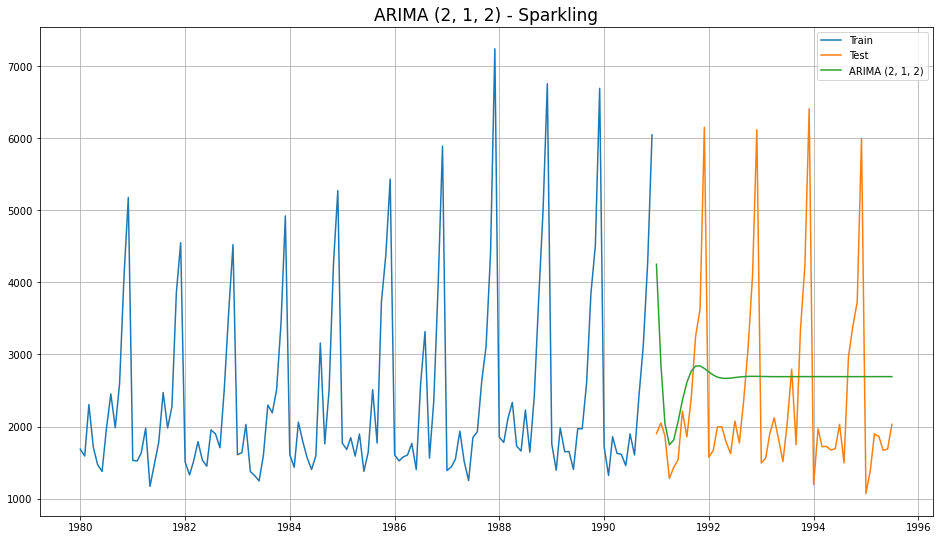

In [246]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best');

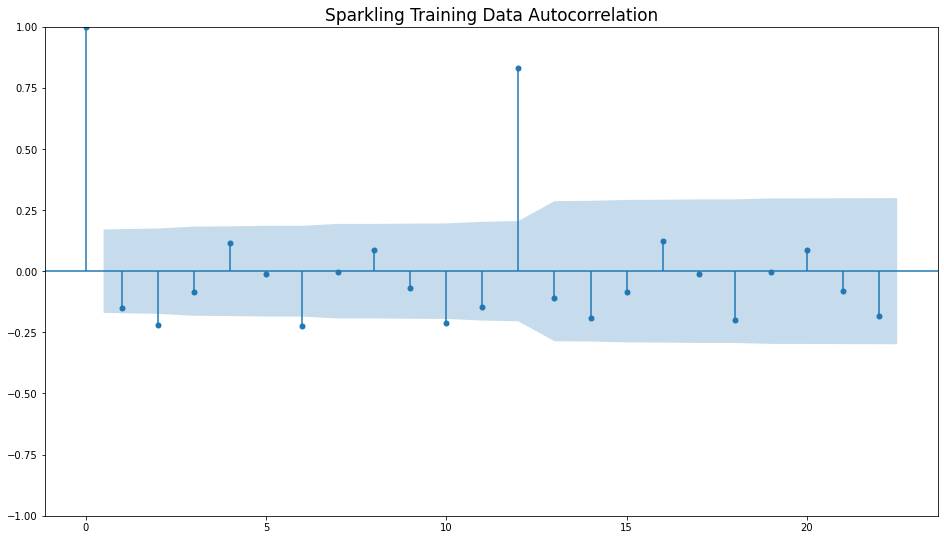

In [247]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

In [248]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 09 Apr 2023   AIC                           2267.663
Time:                        18:41:16   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


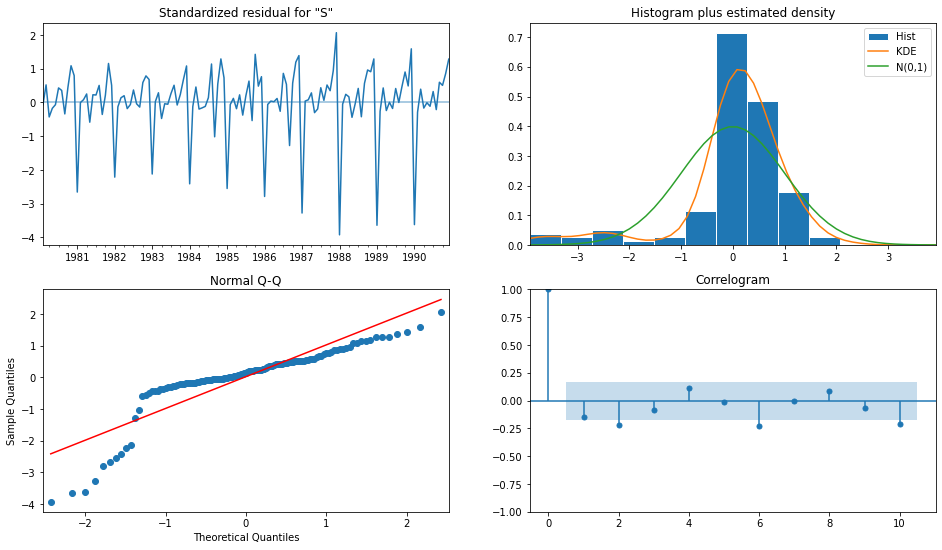

In [249]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

In [250]:

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [251]:

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 2.013276495035274


In [252]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1299.979821  0.471000
ARIMA(0,1,0)  3864.279352  2.013276

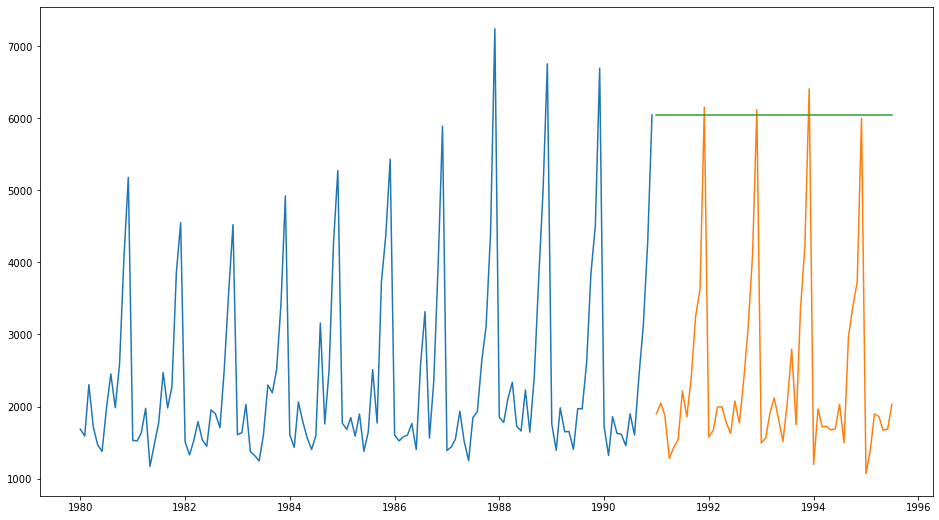

In [253]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast');


In [254]:
# SARIMA - SPARKLING DATA SET

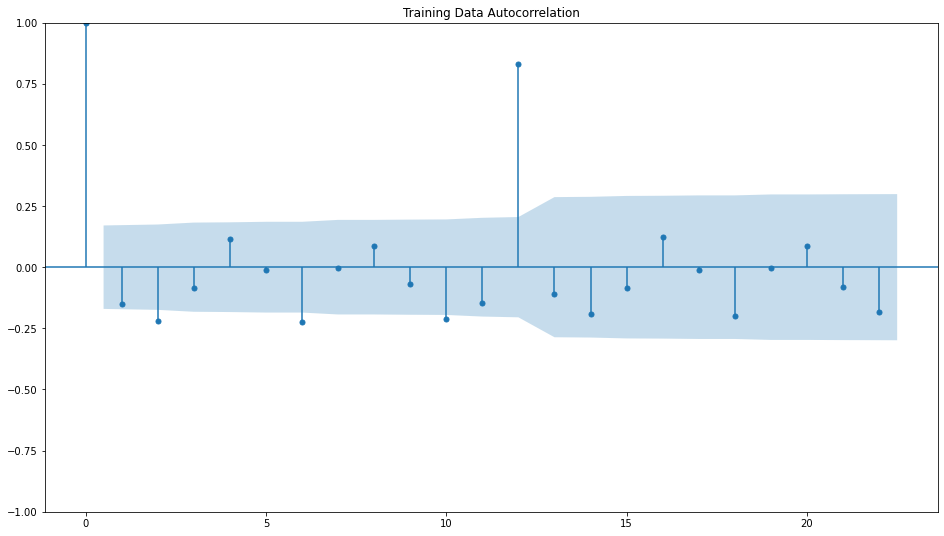

In [255]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [256]:

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [257]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [258]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234275


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3788.8702234504462
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3102.146459235806
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860455


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.98980539208


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2633.1403461999307
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625374


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064632


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6506.405021012982
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566421


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572968055


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3446.263783179349
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193763033


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144283382


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3449.208102198681


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178712


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085449217


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882842353


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:5411.335971909487
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.460767961618


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996569673


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.58892677946


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:6757.580984629763
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687527
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201373


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789891716817


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3608.879428475703
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332312022


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070991748


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068883655


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3763.140576123555
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774455566


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543882324784


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.121563157143


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:97.32576086530659
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407921233


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370882657


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883835049841


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:6684.6434005761585
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408440266


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693815249


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973663132448


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3488.890655448558


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0301790973087


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077981776


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418976005638


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3310.023440490174
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580749472


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674826698942


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048623084692


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:5337.879658048997
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529470066337


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177037645


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.041517634766


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4792.492205700524
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990429


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354565


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3819.916998010865
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.244027933163
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359450557


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563318


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3410.8071456238863
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128908


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132636154


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067498257


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:6906.461698984744


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464035906


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780456383


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660401754947


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:6830.324045025012
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154564


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974130328


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352620624


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3668.1524369695253


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424470454335


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332231566


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863613458


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:14.0
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687877


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223602769


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968338948


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:762.5881272265765


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112082534857


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502484748114


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.014906750192


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2776.6575954974087
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505316
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830749747


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142144302


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3340.482381478013


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259802081927


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871795184658


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842467955563


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:2978.3784732669355


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932039863


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1588.3226223496508


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.076771105998


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394792497


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146974725286


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9983601260512


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:1753.661988427322
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039778062
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938150687233


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217645823002


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3554.475054062371
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596428409


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955491419717


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744598935619


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3334.2056516577063
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154052138383


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669040433742


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292693560897


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:917.9324231260896
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723333723507


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686989736


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649247123563


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435407906


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039814451


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and wil

SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4352.438761088168
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066060363
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349663399


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204835598


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3350.3056926055147


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464844328


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344988118321


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191790344573


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:6798.180429438063
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803059


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620365355


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975674173393


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:6754.873131916587
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131455163


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496025843


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032839


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3308.1342447433035
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429034113


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125436165


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279308175


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3594.617162306464
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896922


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596300826325


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342867514582


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6905.0723913488355


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327192704


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130756763638


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241452520028


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4509.165141279203
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114771516


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372608758158


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432488512


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3698.0127624229713
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140935579478


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3767693060447


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017838243


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2060.2986845540727
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.9010784492957


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476005641451


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401586612067


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376150605267


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036127016476


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4359759753154


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:6688.300384993457
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395885242024


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057322460649


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072842413427


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3798.4046618402176


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.045735131789


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1713.8648805048429


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288459924948


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2955.5162877378734
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6943736795815


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7793379683308


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9471480476075


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789854018017


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992292205852


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2788326924863


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:6607.8136424635695
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418917


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.508992317143


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3879.0924234123413
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703206


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783840837125


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471967386236


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3285.271016683126
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025569301


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812789888


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.68081982987


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:6921.783395987169


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862055817


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774715048866


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307475987735


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6681.658088140153
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983400584


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690700826775


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405122954


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3879.490476702294


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518696487


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085043480892


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844996111297


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3907.306871753966
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505331538


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295662583854


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349818747683


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:6905.4251925735425


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331371707


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814837567676


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959015497032


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:6681.609354091769
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.31472715611


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804323669582


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255040248673


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:5786.708392671617
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.963586595066


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.365040142282


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372577935645


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3338.109443707932
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9501943827645


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894244078345


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.809164428267


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.9247380867641


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602611792299


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.701996655722


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2202.7942510960147
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542045894


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931112329866


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829946913935


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3696.3286642631383
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7426296512904


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1715.7503603953535


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3969579607249


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6394.62861513899
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762937909345


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915683279542


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1551.9130792649553


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:481.3287318610489
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970044525373


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698614339145


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926083859978


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:6604.554857375581


C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\277240370.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [259]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
87   (1, 1, 1)  (1, 0, 3, 12)         14.0
107  (1, 1, 2)  (2, 0, 3, 12)         18.0
171  (2, 1, 2)  (2, 0, 3, 12)         20.0
127  (1, 1, 3)  (3, 0, 3, 12)         22.0
187  (2, 1, 3)  (2, 0, 3, 12)         22.0
235  (3, 1, 2)  (2, 0, 3, 12)         22.0
43   (0, 1, 2)  (2, 0, 3, 12)    97.325761
251  (3, 1, 3)  (2, 0, 3, 12)   481.328732
91   (1, 1, 1)  (2, 0, 3, 12)   762.588127
123  (1, 1, 3)  (2, 0, 3, 12)   917.932423
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497004
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195902
238  (3, 1, 2)  (3, 0, 2, 12)  1389.701997
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692608
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169861
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677472
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307476
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789854
236  (3, 1, 2)  (3, 0, 0, 12)  1400.924738
190  (2, 1, 3)  (3, 0, 2, 12)  1401.278833
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437615
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.503613
157  (2, 1, 1)  (3, 0, 1, 12)  1403.130757
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435976
158  (2, 1, 1)  (3, 0, 2, 12)  1403.824145
189  (2, 1, 3)  (3, 0, 1, 12)  1403.992292
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810239
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197567
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911208
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914697
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950248
110  (1, 1, 2)  (3, 0, 2, 12)   1415.99836

In [260]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sun, 09 Apr 2023   AIC                           1387.788
Time:                                     18:47:26   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

Predict on the Test Set using this model and evaluate the model.

In [261]:

predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [262]:

predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.352969  415.861319     574.279761    2204.426178
1991-02-01  1224.672450  427.866006     386.070488    2063.274412
1991-03-01  1673.337773  428.010513     834.452583    2512.222963
1991-04-01  1533.304740  432.773829     685.083621    2381.525859
1991-05-01  1425.949551  435.887629     571.625497    2280.273605

In [263]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2433615993934 
MAPE: 0.25870670481807456


In [264]:

temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)             1299.979821  0.471000
ARIMA(0,1,0)             3864.279352  2.013276
SARIMA(3,1,1)(3,0,2,12)   601.243362  0.258707

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING


In [265]:
from statsmodels.graphics.tsaplots import  plot_pacfD

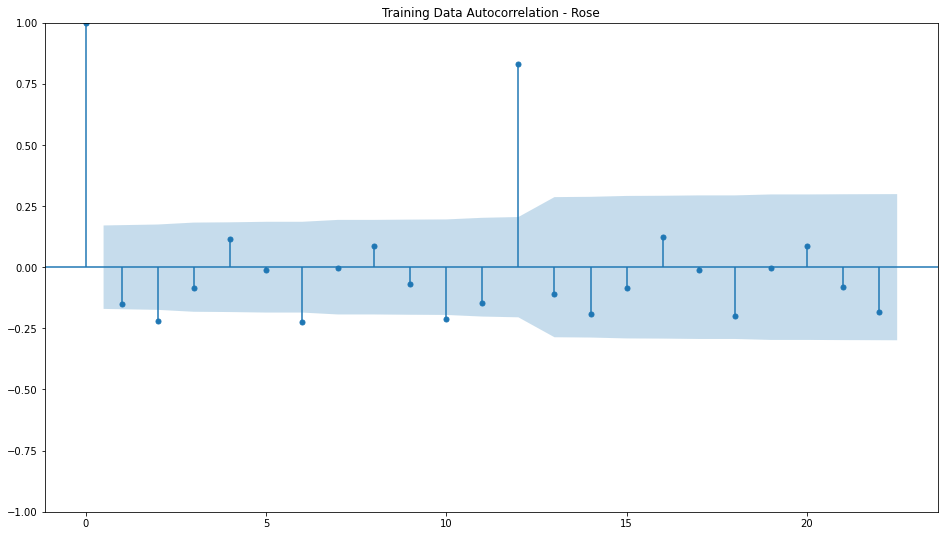

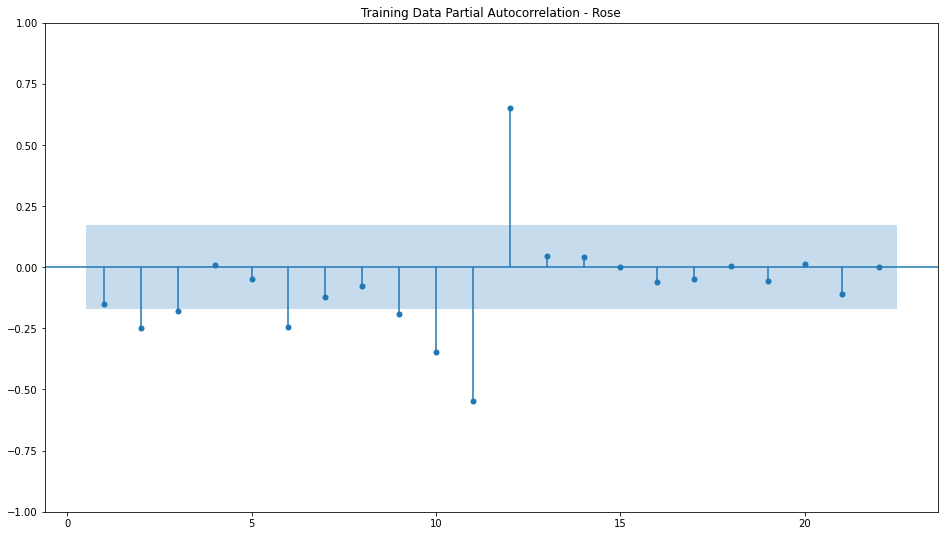

In [266]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [267]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sun, 09 Apr 2023   AIC                           1628.324
Time:                                      18:47:26   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [268]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 09 Apr 2023   AIC                           1455.991
Time:                                         18:47:27   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [269]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sun, 09 Apr 2023   AIC                           1288.607
Time:                                         18:47:29   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

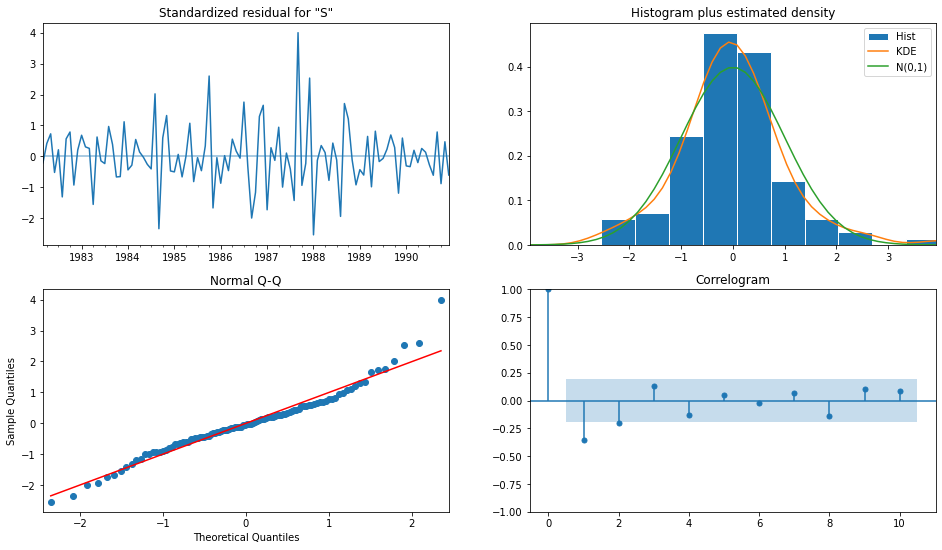

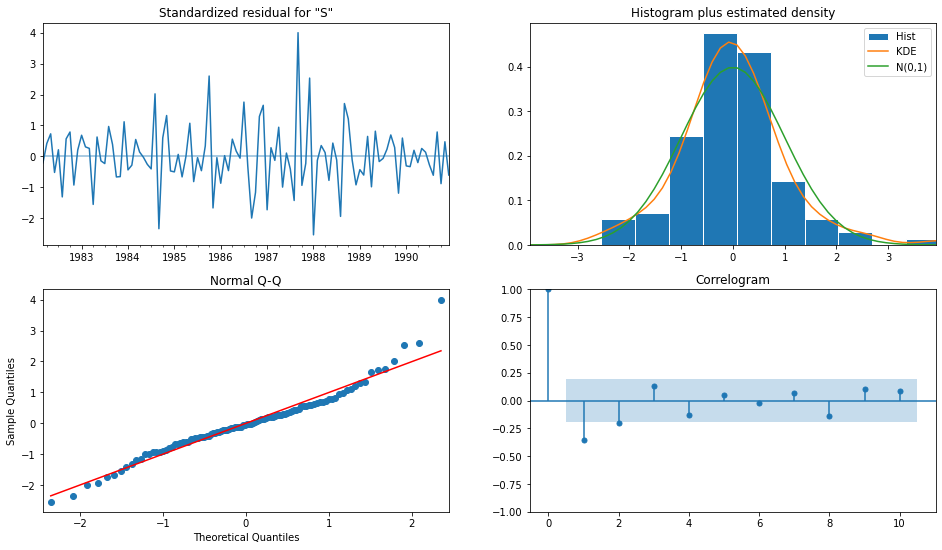

In [270]:
results_manual_SARIMA.plot_diagnostics()

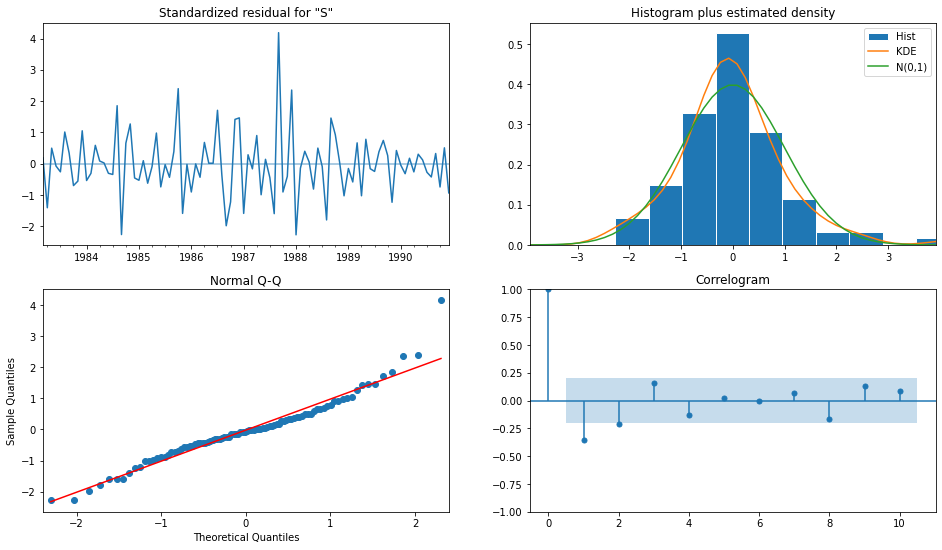

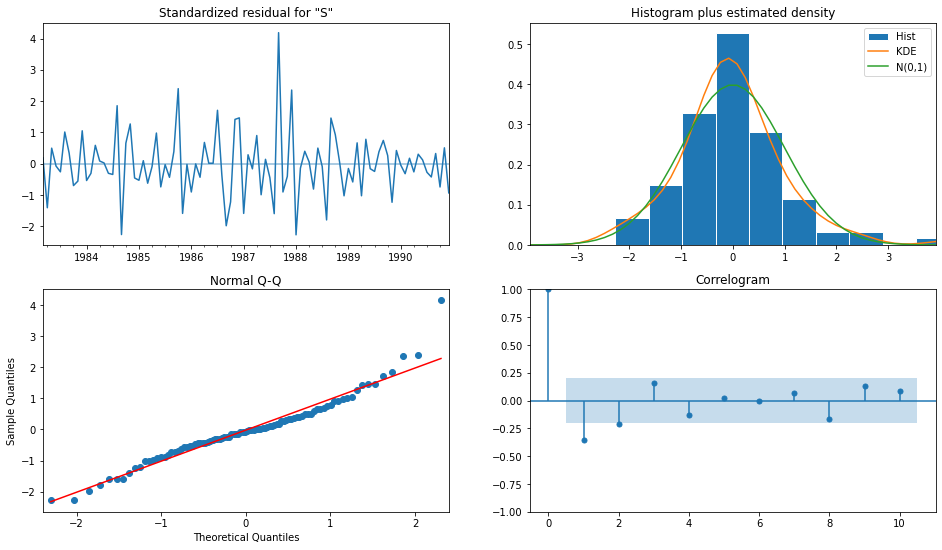

In [271]:
results_manual_SARIMA1.plot_diagnostics()


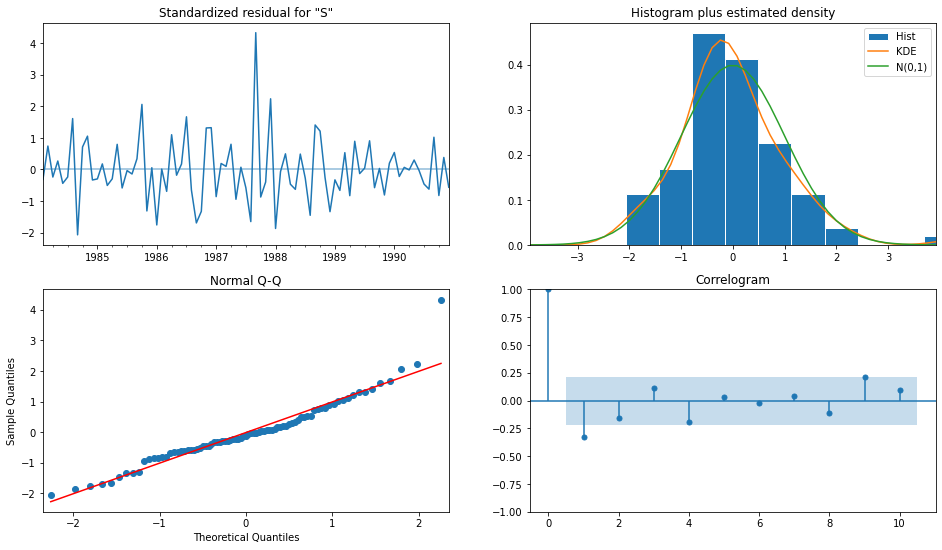

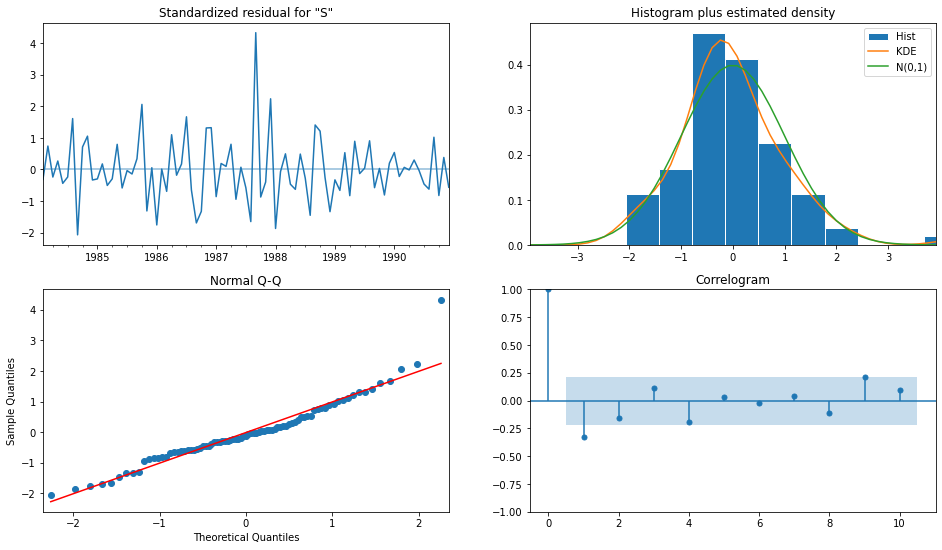

In [272]:
results_manual_SARIMA2.plot_diagnostics()

In [273]:
### Predict on the Test Set using this model and evaluate the model.

In [274]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [275]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357891698454 
MAPE: 0.5487253598776217


In [276]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.7277611765403 
MAPE: 0.8178527556159169


In [277]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.645264286326 
MAPE: 0.7156614839554168


In [278]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)             1299.979821  0.471000
ARIMA(0,1,0)             3864.279352  2.013276
SARIMA(3,1,1)(3,0,2,12)   601.243362  0.258707
SARIMA(0,1,0)(3,1,2,12)  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)  1551.645264  0.715661

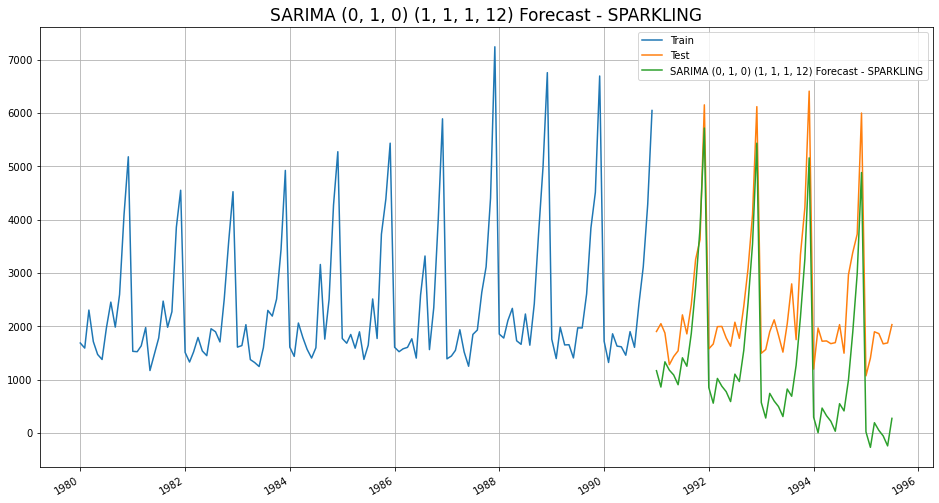

In [279]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17);

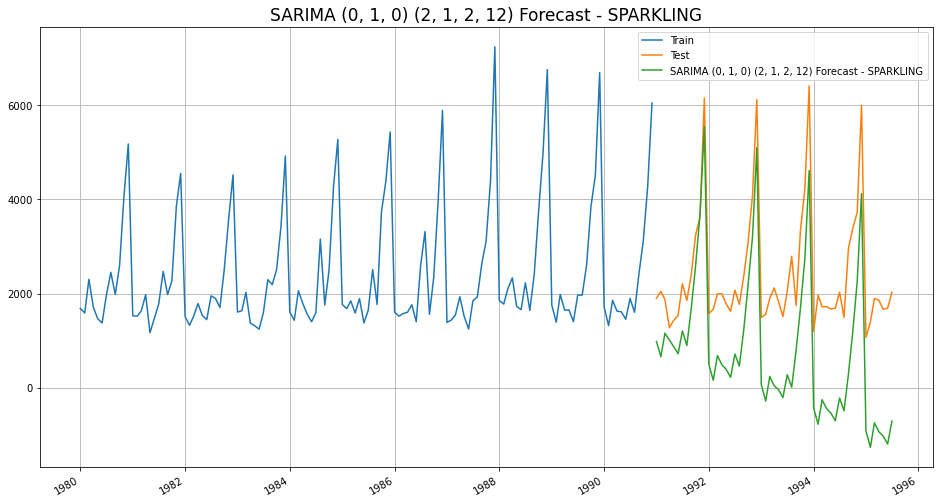

In [280]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17);

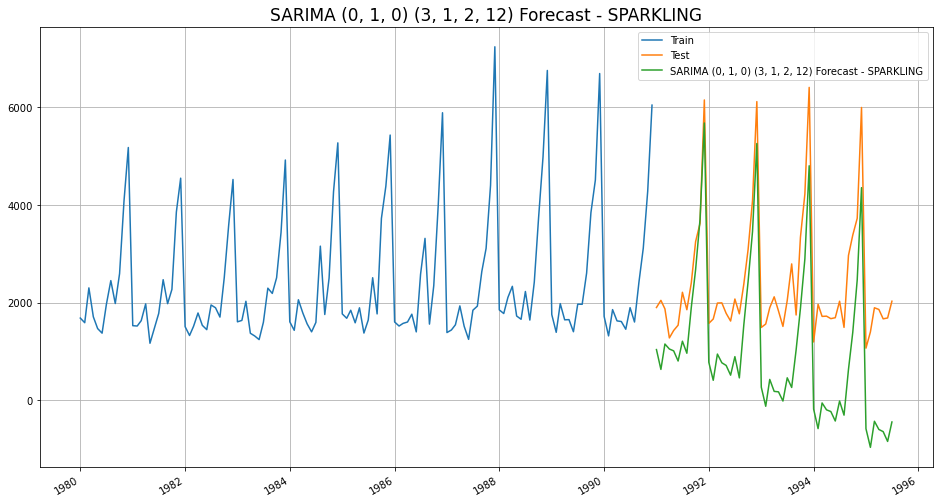

In [281]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17);


In [282]:
### Rose Data set

In [283]:

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [284]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [285]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.appen

ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868424


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.appen

ARIMA(2, 1, 2) - AIC:1281.8707222264402


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

ARIMA(2, 1, 3) - AIC:1274.6953561209548
ARIMA(3, 1, 0) - AIC:1297.4810917271725
ARIMA(3, 1, 1) - AIC:1282.4192776271946
ARIMA(3, 1, 2) - AIC:1283.720740597711


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:1278.6619652725685


C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\357973572.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [286]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695356
15  (3, 1, 3)  1278.661965
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [287]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 09 Apr 2023   AIC                           1274.695
Time:                        18:47:32   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.992      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.684      0.000      -0.893      -0.564
ma.L1          1.0446      0.628      1.665      0.0

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


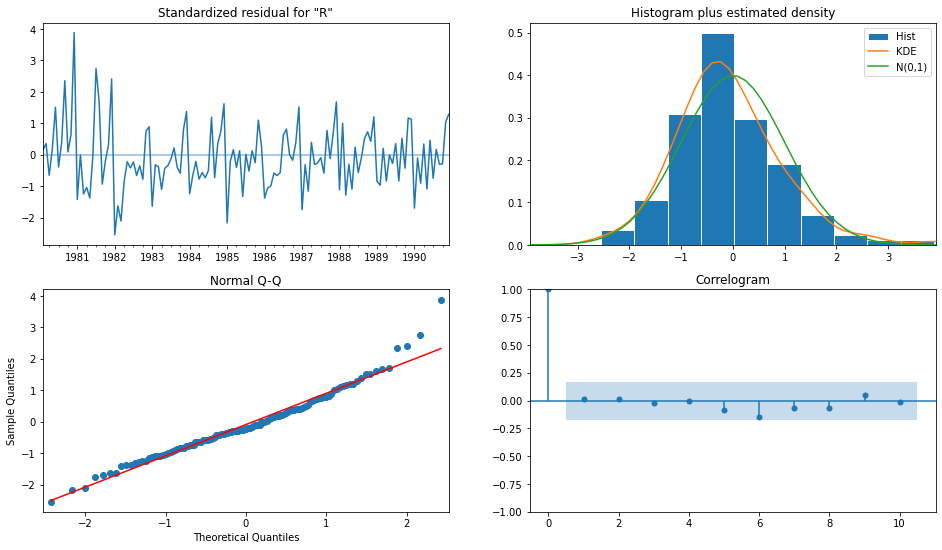

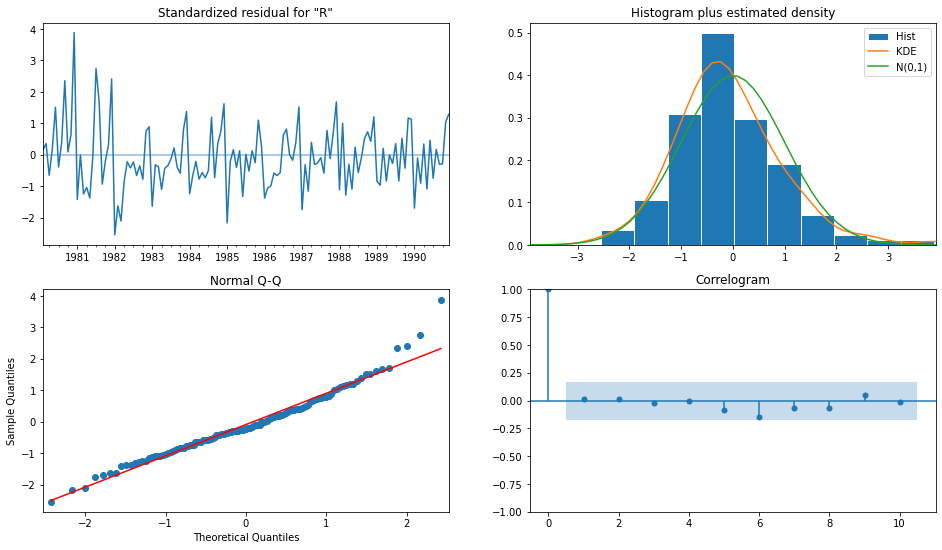

In [288]:
results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

In [289]:
# Predict on the Rose Test Set using this model and evaluate the model.

In [290]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.605078
1991-02-01    90.532552
1991-03-01    81.968167
1991-04-01    92.748215
1991-05-01    80.900983
1991-06-01    92.924087
1991-07-01    81.383696
1991-08-01    91.985881
1991-09-01    82.606225
1991-10-01    90.618235
1991-11-01    84.010151
1991-12-01    89.259200
1992-01-01    85.267413
1992-02-01    88.139999
1992-03-01    86.229119
1992-04-01    87.341950
1992-05-01    86.867334
1992-06-01    86.852661
1992-07-01    87.223215
1992-08-01    86.612100
1992-09-01    87.367501
1992-10-01    86.545316
1992-11-01    87.374402
1992-12-01    86.582413
1993-01-01    87.307122
1993-02-01    86.668274
1993-03-01    87.212081
1993-04-01    86.765177
1993-05-01    87.118744
1993-06-01    86.851173
1993-07-01    87.042469
1993-08-01    86.916486
1993-09-01    86.988463
1993-10-01    86.959507
1993-11-01    86.955635
1993-12-01    86.983237
1994-01-01    86.939742
1994-02-01    86.992612
1994-03-01    86.935595
1994-04-01    86.992737
1994-05-01    86.938408
1994-06-01    86

In [291]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.813470393936946 
MAPE: 0.7584004193784372


In [292]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)        36.81347          0.7584

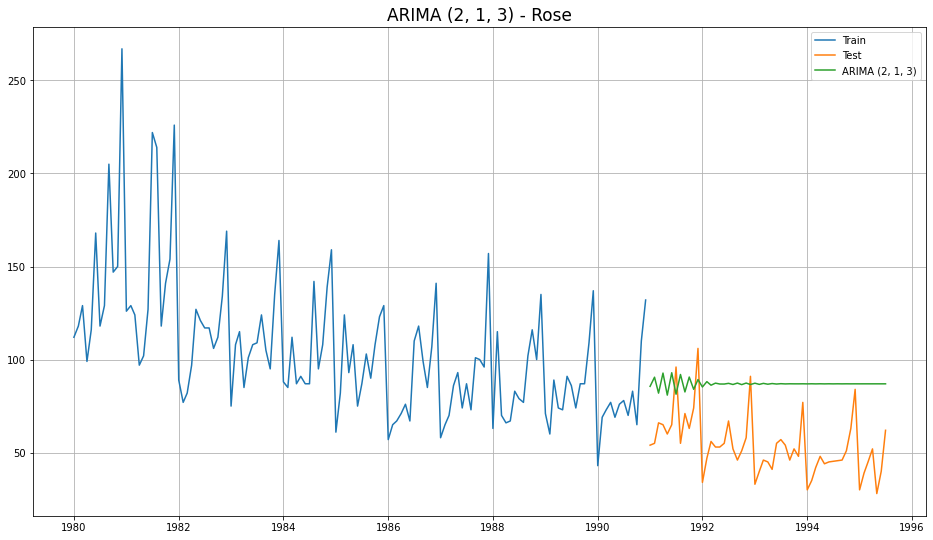

In [293]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE datase

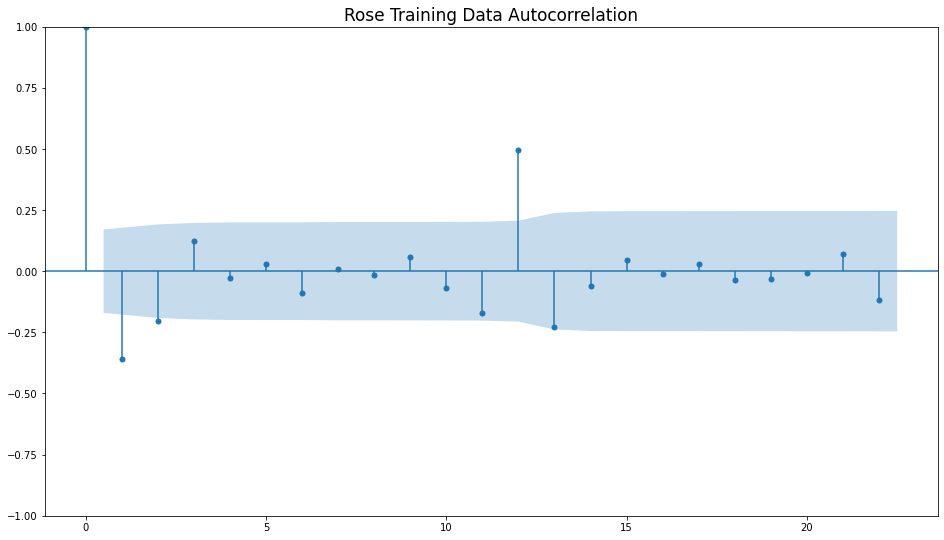

In [294]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');

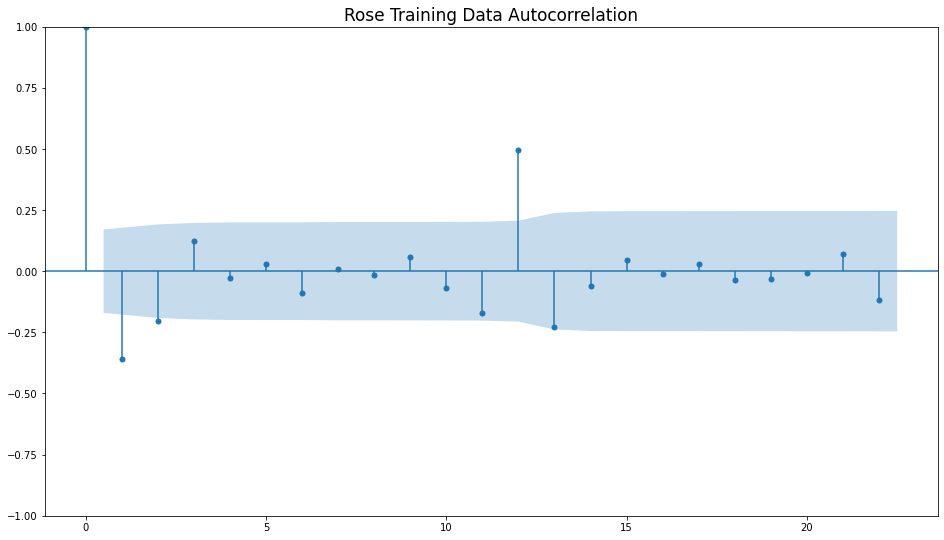

In [295]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');

Here, we have taken alpha=0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off.

- The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off.

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [296]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 09 Apr 2023   AIC                           1281.871
Time:                        18:47:34   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [297]:
### Let us analyse the residuals from the various diagnostics plot.

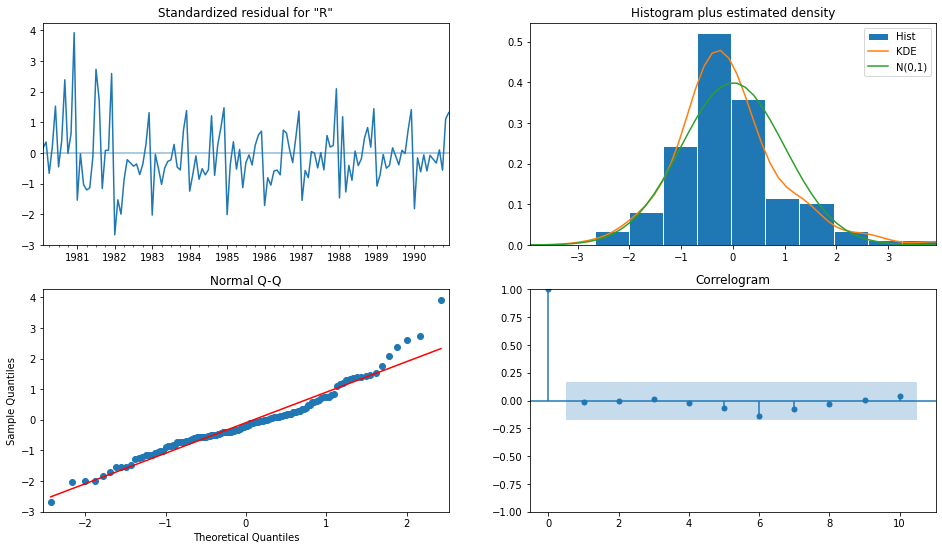

In [298]:
results_manual_ARIMA.plot_diagnostics();

In [300]:
### Predict on the Test Set using this model and evaluate the model.

In [301]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [302]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119661804801 
MAPE: 0.7605621271441845


In [303]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsR2 = pd.concat([resultsR0,temp_resultsR2])
resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.813470        0.758400
ARIMA(2,1,2)       36.871197        0.760562

In [304]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.813470        0.758400
ARIMA(2,1,2)       36.871197        0.760562

Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Rose')

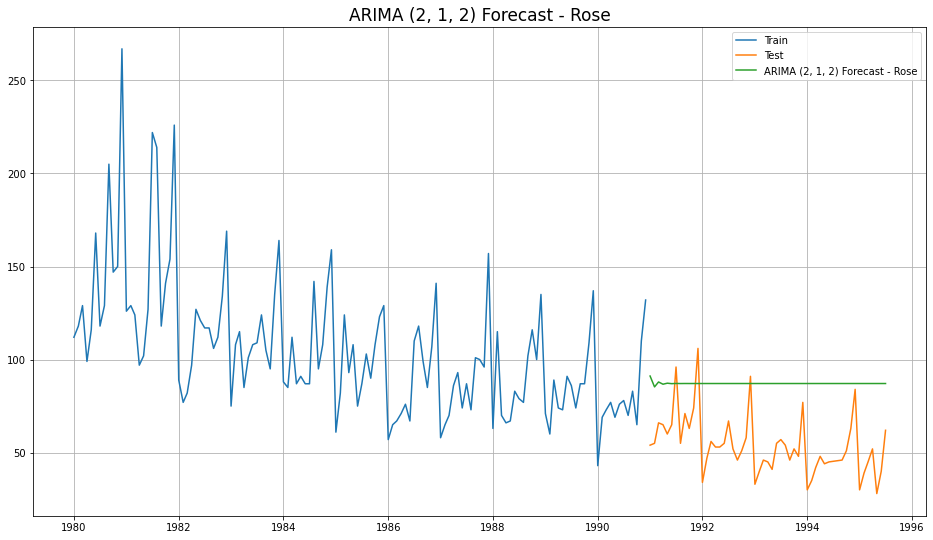

In [305]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

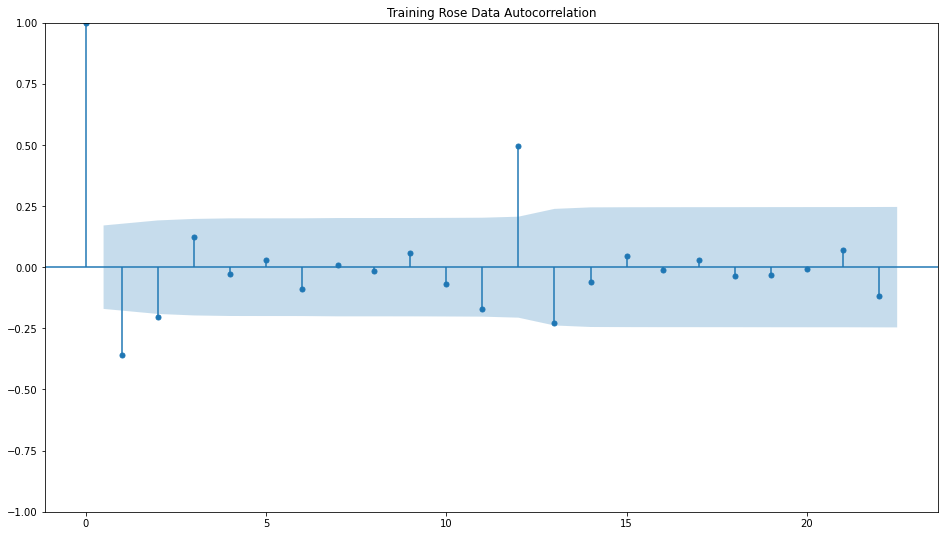

In [306]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [307]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [308]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [309]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207386


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380903


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3994.7201928422214
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385767


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635754913
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3801.0056501147847
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945715


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:5644.471437825422
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702714087


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127778


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3843.9094675774722
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383913


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3812.2263068724546
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918096
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947592


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483300271


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3442.2711593212944
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536011


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260106638


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:5109.0038825184365


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764816959


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844932689858


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269370274


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3496.1791831541277
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054106
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264868


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617705


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4201.209217472669
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413757
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933547742


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913540886


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3899.6477299708827
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257976


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545051985


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680304


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:4960.110503249995
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374651


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080534338


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528338119


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3557.243855130118
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739109
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.763264607837


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380675


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2831.37825742173
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.205136121227


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212934789


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523341046


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3622.955941170985


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.947710898705


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996903726


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253869


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:4884.1980211375085
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124799054


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772318107


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150754367635


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4139.025652849179
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295544758571


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3687.3028788822576
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804594
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055025245


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948505


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3193.2841246115745
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664086
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071439


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:5814.341704608377
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272404


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.150137157357


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305087588576


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3276.5613357502853
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640711


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063865


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3866.3309565212207
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031155
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547134137


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428499555


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3421.8454124678997
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060839028


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470778


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593682


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:4969.166150017314
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439381729


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447841288


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850312013


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3424.498567370377
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706227
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101027


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402687189


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3447.2927509326205


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760928442033


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211327557


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500582871


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3281.518299232673
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196656119


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827969797


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.8717668633517


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4893.62626496279
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801474945


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805905303


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390256921943


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3418.3070653847926
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531617


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849740065406


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105101109


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3545.3779100692022
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675933


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928680253


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232302947584


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3798.4228690322643


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687610341547


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660093145


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886592391202


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:4881.4912336111565
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903136093145


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140235927


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467934005594


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3063.924872958354
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471144


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829961


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3850.278511402389
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641096


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559131


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3460.241207015586
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645493


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384188


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280802


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:5729.356278396099
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407409111


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.047263790302


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372861


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3274.318408499404
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231801497
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949383


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472071325


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3223.9962179262916
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101435


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471208533


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822848


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3877.6344414832647


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608196617


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369554


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286412


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:4966.510727683186
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600253445


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258932856


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.059888726936


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4132.35000275565
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614668


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259822


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311126987


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3173.847450733612


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713695268


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353605251


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488806784


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2967.753768577894
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.346444113502


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888984845


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981296392


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:5032.767562276918
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712862525


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035436831


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640502913844


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3771.513124361352
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8703308689642


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334709416


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349290735613


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3769.209792815469
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563352485342


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461969647677


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353878106


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4296.205884682063
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301543576


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.232806141173


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191807630987


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:5097.3399180387705
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208074042


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101470184364


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452495120315


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3341.064176888744
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042233


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118006


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3856.9843752042702
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456725728


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783342


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304789


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3785.4526696114444
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197907098


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976515


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472921


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:5513.285760736789


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701528664


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661984


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017169421


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and 

SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3342.991871978492
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709336
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641238998


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547551


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3832.6486684749325
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.614913651354


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554269556


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384262


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3872.110925493171


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459898217


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537954


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523226816


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:5035.81003937405
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990389883


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300792184


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.400285679646


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:4140.166945999869
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652270935


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401420966


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980112519722


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3877.1562168863343
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211487903


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517744263


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875121314783


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4025.7945025150534
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3183840607726


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441194814


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431301938173


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3441.1159109817686
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505645846735


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462148333135


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809352713401


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3084.384023336879


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385925229419


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397683823371


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.334017177607


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:4194.85166432144
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8463763751492


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380907448


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483671004334


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2676.733549342201
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711793227


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100869998


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714873026


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:5026.331931674906
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610185081821


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690409028603


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316169896598


C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3412.6656981256183


C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Matrix\AppData\Local\Temp\ipykernel_22008\1641201857.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [310]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286
238  (3, 1, 2)  (3, 0, 2, 12)  774.880935
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)   775.49533
252  (3, 1, 3)  (3, 0, 0, 12)  775.561019

In [311]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 09 Apr 2023   AIC                            774.400
Time:                                         18:52:31   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

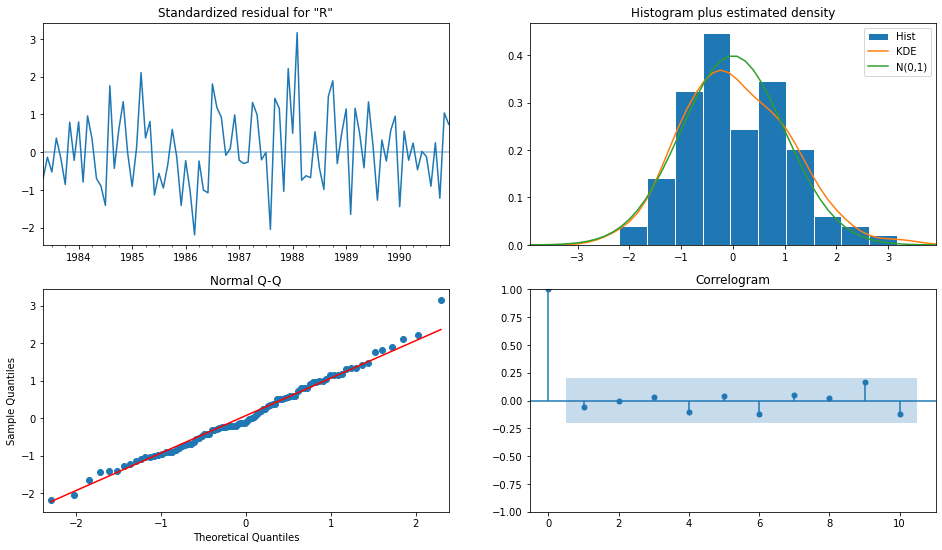

In [312]:
results_auto_SARIMA.plot_diagnostics();

In [314]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [315]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.235777  13.907460      27.977656      82.493898
1991-02-01  68.122643  13.990892      40.700998      95.544289
1991-03-01  67.908788  14.011943      40.445884      95.371691
1991-04-01  66.786249  14.099267      39.152194      94.420304
1991-05-01  69.760445  14.108627      42.108044      97.412845

In [316]:
predicted_auto_SARIMA1

In [317]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)

In [318]:
mp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose         RMSE      MAPE
ARIMA(2,1,3)                  36.813470        0.758400          NaN       NaN
ARIMA(2,1,2)                  36.871197        0.760562          NaN       NaN
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)             NaN             NaN  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1551.645264  0.715661

In [319]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose         RMSE      MAPE
ARIMA(2,1,3)                  36.813470        0.758400          NaN       NaN
ARIMA(2,1,2)                  36.871197        0.760562          NaN       NaN
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)             NaN             NaN  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1551.645264  0.715661

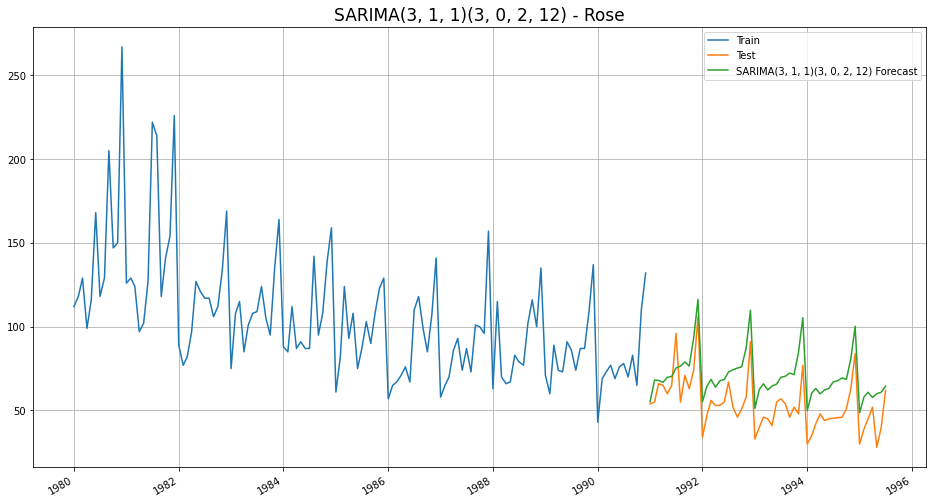

In [320]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);


In [321]:
##Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12


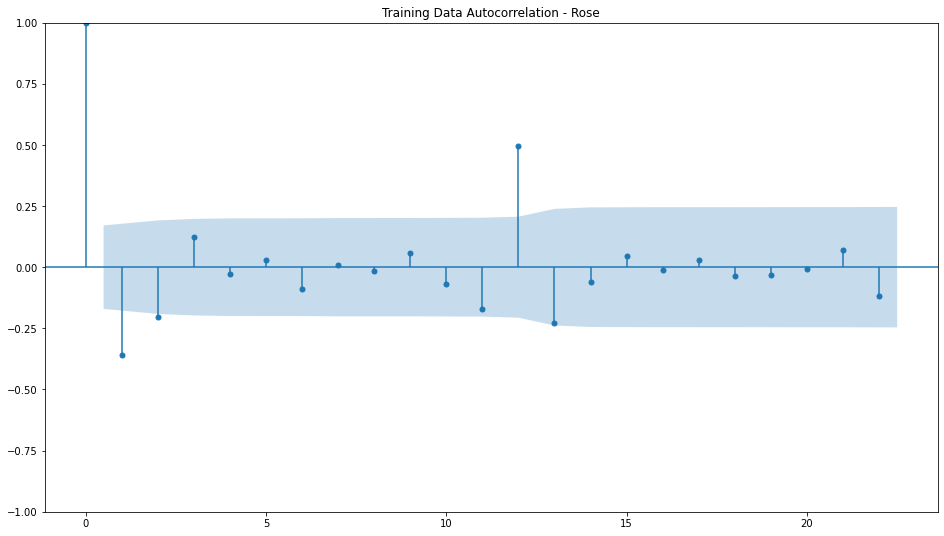

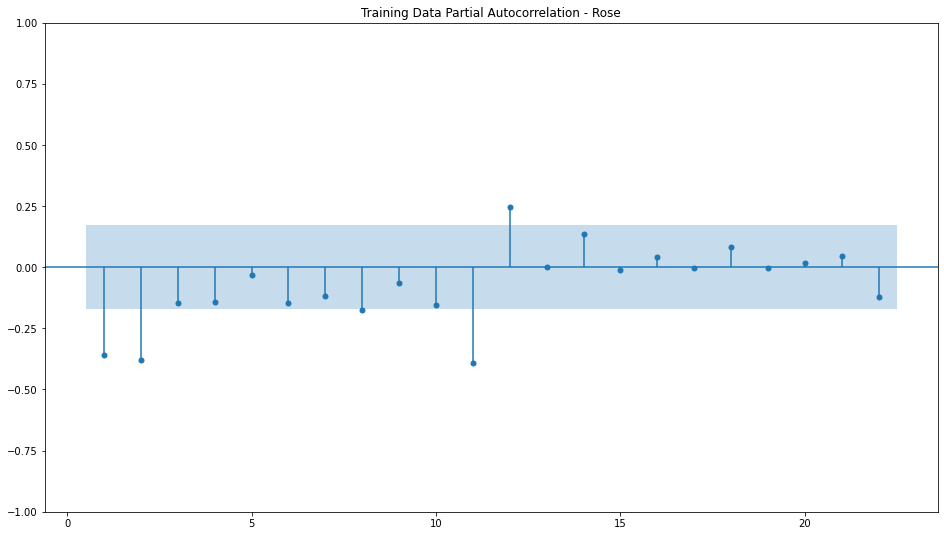

In [322]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

## Here, we have taken alpha=0.05.

- We are going to take the seasonal period as 12 We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

- The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.

- The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [323]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 09 Apr 2023   AIC                            776.996
Time:                                    18:54:38   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.837      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [324]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 09 Apr 2023   AIC                            689.786
Time:                                    18:54:47   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7088      0.403      1.757      0.079      -0.082       1.500
ar.L2         -0.1501      0.176   

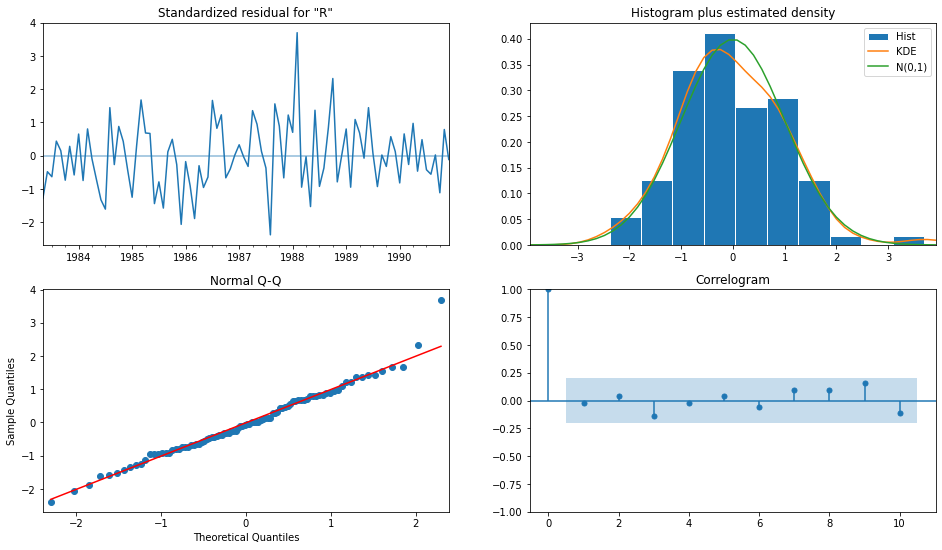

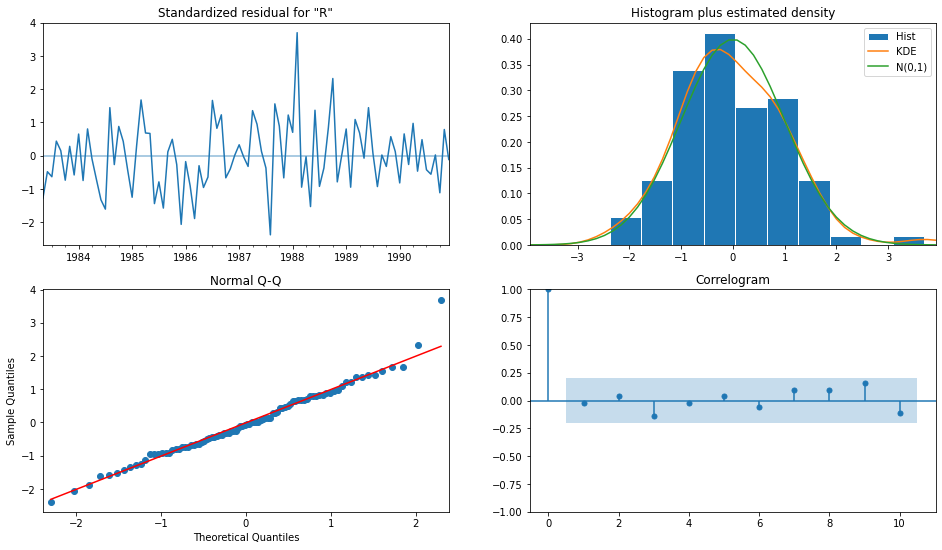

In [325]:
results_manual_SARIMA.plot_diagnostics()

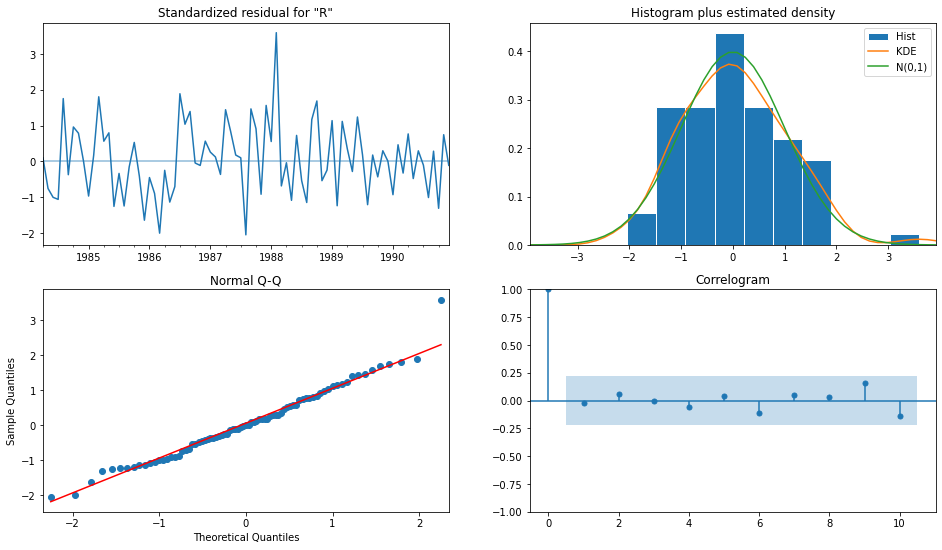

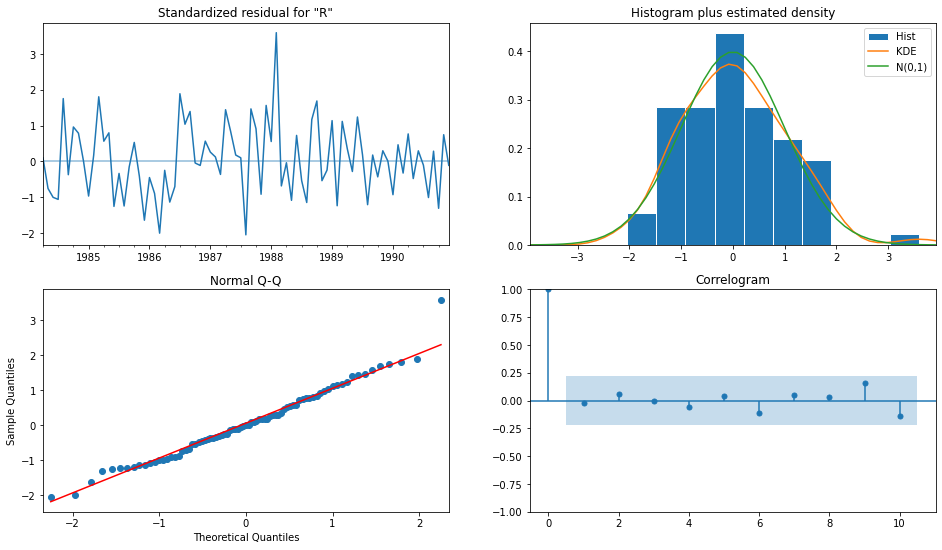

In [326]:
results_manual_SARIMA1.plot_diagnostics()

In [327]:
## Predict on the Test Set using this model and evaluate the model.
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [328]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.551601834226712 
MAPE: 0.2547924428579398


In [329]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.360223382443275 
MAPE: 0.22962869214313347


In [330]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose         RMSE      MAPE
ARIMA(2,1,3)                  36.813470        0.758400          NaN       NaN
ARIMA(2,1,2)                  36.871197        0.760562          NaN       NaN
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)             NaN             NaN  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1551.645264  0.715661
SARIMA(2,1,2)(3,1,2,12)       15.360223        0.229629          NaN       NaN

In [331]:
resultsR0 = resultsDf.copy()

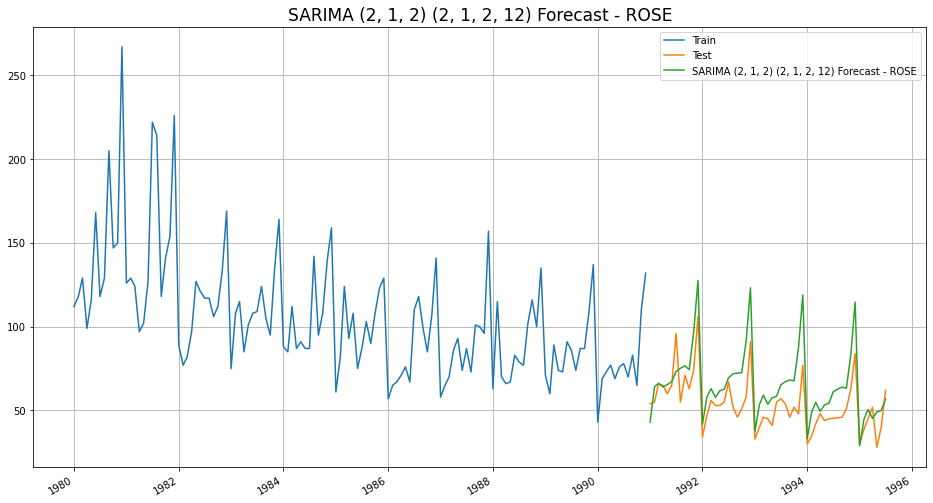

In [333]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17);

### Building the most optimum model on the Full Data.

In [335]:
full_data_model = sm.tsa.statespace.SARIMAX(Rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Matrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 09 Apr 2023   AIC                           1193.062
Time:                                    18:56:35   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8650      0.101     -8.557      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

### Evaluate the model on the whole data and predict 12 months into the future

In [336]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [337]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083240  12.673822      18.243006      67.923474
1995-09-01  43.342804  12.959446      17.942757      68.742851
1995-10-01  45.827645  12.963459      20.419732      71.235557
1995-11-01  57.397751  13.124193      31.674804      83.120697
1995-12-01  85.075385  13.133043      59.335093     110.815677

In [339]:
rmse = mean_squared_error(Rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91174986804591


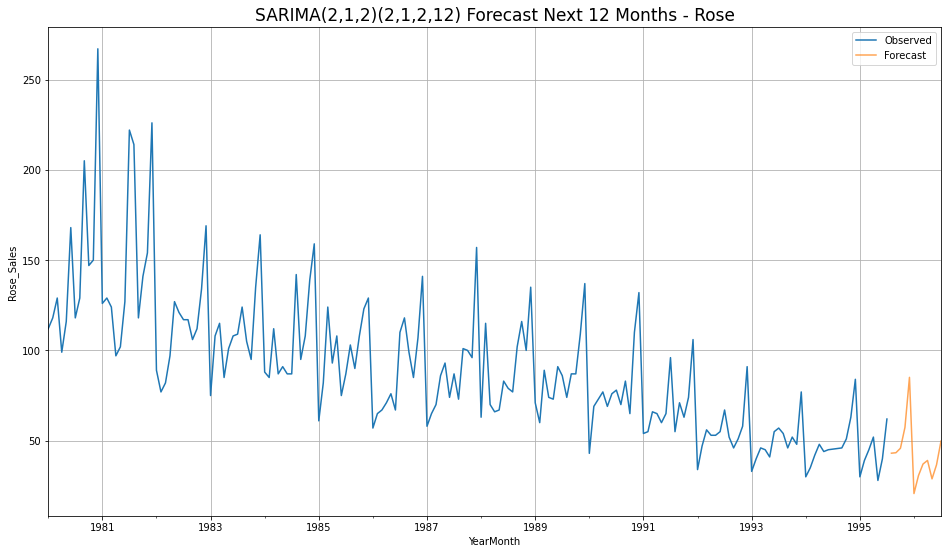

In [340]:
axis = Rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);

In [341]:

resultsDf

Test RMSE Rose  Test MAPE Rose         RMSE      MAPE
ARIMA(2,1,3)                  36.813470        0.758400          NaN       NaN
ARIMA(2,1,2)                  36.871197        0.760562          NaN       NaN
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)             NaN             NaN  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1551.645264  0.715661
SARIMA(2,1,2)(3,1,2,12)       15.360223        0.229629          NaN       NaN

In [347]:

results = pd.concat([RMSE_latest4, resultsDf], axis=0)

In [348]:
results

Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.000861   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.625883   
Triple Exponential Smoothing (Multiplicative Se...           402.936179   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796236   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
ARIMA(2,1,3)                                             36.813470   
ARIMA(2,1,2)                                             36.871197   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                  15.360223   

                                                    Test MAPE Rose  \
RegressionOnTime                                               NaN   
NaiveModel                                                     NaN   
SimpleAverageModel                                             NaN   
2pointTrailingMovingAverage                                    NaN   
4pointTrailingMovingAverage                                    NaN   
6pointTrailingMovingAverage                                    NaN   
9pointTrailingMovingAverage                                    NaN   
Simple Exponential Smoothing                                   NaN   
Double Exponential Smoothing                                   NaN   
Triple Exponential Smoothing (Additive Season)                 NaN   
Triple Exponential Smoothing (Multiplicative Se...             NaN   
ARIMA(2,1,3)                                              0.758400   
ARIMA(2,1,2)                                              0.760562   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                   0.229629   

                                                           RMSE      MAPE  
RegressionOnTime                                            NaN       NaN  
NaiveModel                 

In [349]:

resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose         RMSE      MAPE
SARIMA(2,1,2)(3,1,2,12)       15.360223        0.229629          NaN       NaN
ARIMA(2,1,3)                  36.813470        0.758400          NaN       NaN
ARIMA(2,1,2)                  36.871197        0.760562          NaN       NaN
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1189.835789  0.548725
SARIMA(0,1,0)(2,1,2,12)             NaN             NaN  1757.727761  0.817853
SARIMA(0,1,0)(3,1,2,12)             NaN             NaN  1551.645264  0.715661